# Ticket to Talent: The H-1B Lottery Insight

**Problem Definition:** This project will analyze the essential factors that affect H-1B visa approvals, emphasizing the demographics of applicants such as gender, age, nationality, and education as well as the characteristics of employers, including industry sector and geographic distribution. We seek to uncover patterns in successful applications by examining trends from the last three years. These trends will show us the changing demand for international talent, giving important insights and recommendations to future applicants on making informed decisions about potential employers and regions with higher H-1B approval rates. Comparing this with the general context of the US job market, this project aims to identify sectors with both high H-1B approval rates and favorable employment conditions. We seek to provide a deeper understanding of where international talent is in demand and what types of roles may offer competitive wages, improving our recommendations for H-1B applicants.

**Motivation:** This research will examine essential elements influencing H-1B visa approvals, offering international professionals valuable, data-backed insights into the companies, industries, locations, and career paths. Analyzing demand trends for international professionals provides crucial insights as they maneuver through the competitive and unpredictable H-1B environment. We are also all international students in the team, so this is personally relevant to our careers as well.

**Data Source:**

1. The first dataset is originally from the US Department of Homeland Security, and is hosted by Bloomberg in the following GitHub repository: https://github.com/BloombergGraphics/2024-h1b-immigration-data
We examined the following CSV files. Each file contains at least 100,000 rows of data:
- H1B visa statistics for 2021: TRK_13139_FY2021.csv
- H1B visa statistics for 2022: TRK_13139_FY2022.csv
- H1B visa statistics for 2023: TRK_13139_FY2023.csv

2.  The second dataset comprises state-level data for 2021 to 2023, covering various socio-economic indicators such as GDP, GDP per capita, median household income, population, and unemployment rates. This data was collected from multiple official U.S. government websites, including USAFacts, Wisevoter, and the United States Census Bureau. The dataset includes calculated fields for each state, namely the "GDP ratio of state" and "population ratio of state." These datasets are available on GitHub: https://github.com/MANYI-anewbird/775.git
We examined the following Excel files:
- 2021 State Information.xslx
- 2022 State Information.xslx
- 2023 State Information.xslx

3. We also used a dataset from the United States Census Bureau which shows the respective industry names for the NAICS codes. This dataset was downloaded from the following link: https://www.census.gov/naics/?48967
We examined the following Excel file:
- 2022_NAICS_Cross_References.xslx

**Executive Summary:** This project dives into the key factors that influence H-1B visa approvals, focusing on applicants' demographics like age, gender, nationality, and education level, as well as the industries and locations of their employers. Using data from the past three years, we uncovered some clear patterns that shape how H-1B approvals work. For instance, younger professionals, particularly those between 25-34 years old, dominate approvals, making up over 70% of successful applicants. Applicants from India and China represent a huge portion of approvals—nearly 80%—showing how dominant these two countries are in the international talent pool. Education is also a game changer: having a master’s degree boosts your chances significantly, with more than two-thirds of approved applicants holding this qualification. When it comes to industries, the technology sector leads by a wide margin, with job titles like “Software Engineer” and “Data Scientist” frequently showing up in the data. Geographically, states like California, Texas, and Washington have the highest number of H-1B jobs, reflecting their strong tech and business ecosystems. On the flip side, we also found gender disparities, with men significantly outnumbering women in technical fields. Based on these insights, Encourage applicants to focus on roles in high-demand industries like technology and consider relocating to states with strong tech ecosystems, such as California, Texas, and Washington, to improve approval chances. Some future steps include incorporating employer-specific data and analyze trends in salary growth or visa denials to deepen insights into H-1B dynamics.

**Tableau Dashboard**

Dashboard 1 Link: https://public.tableau.com/shared/N7DZM5RGG?:display_count=n&:origin=viz_share_link

Darshboard 2 Link: https://public.tableau.com/views/H1BFinalDashboard/EmployerDashboard?:language=zh-CN&p[…]sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

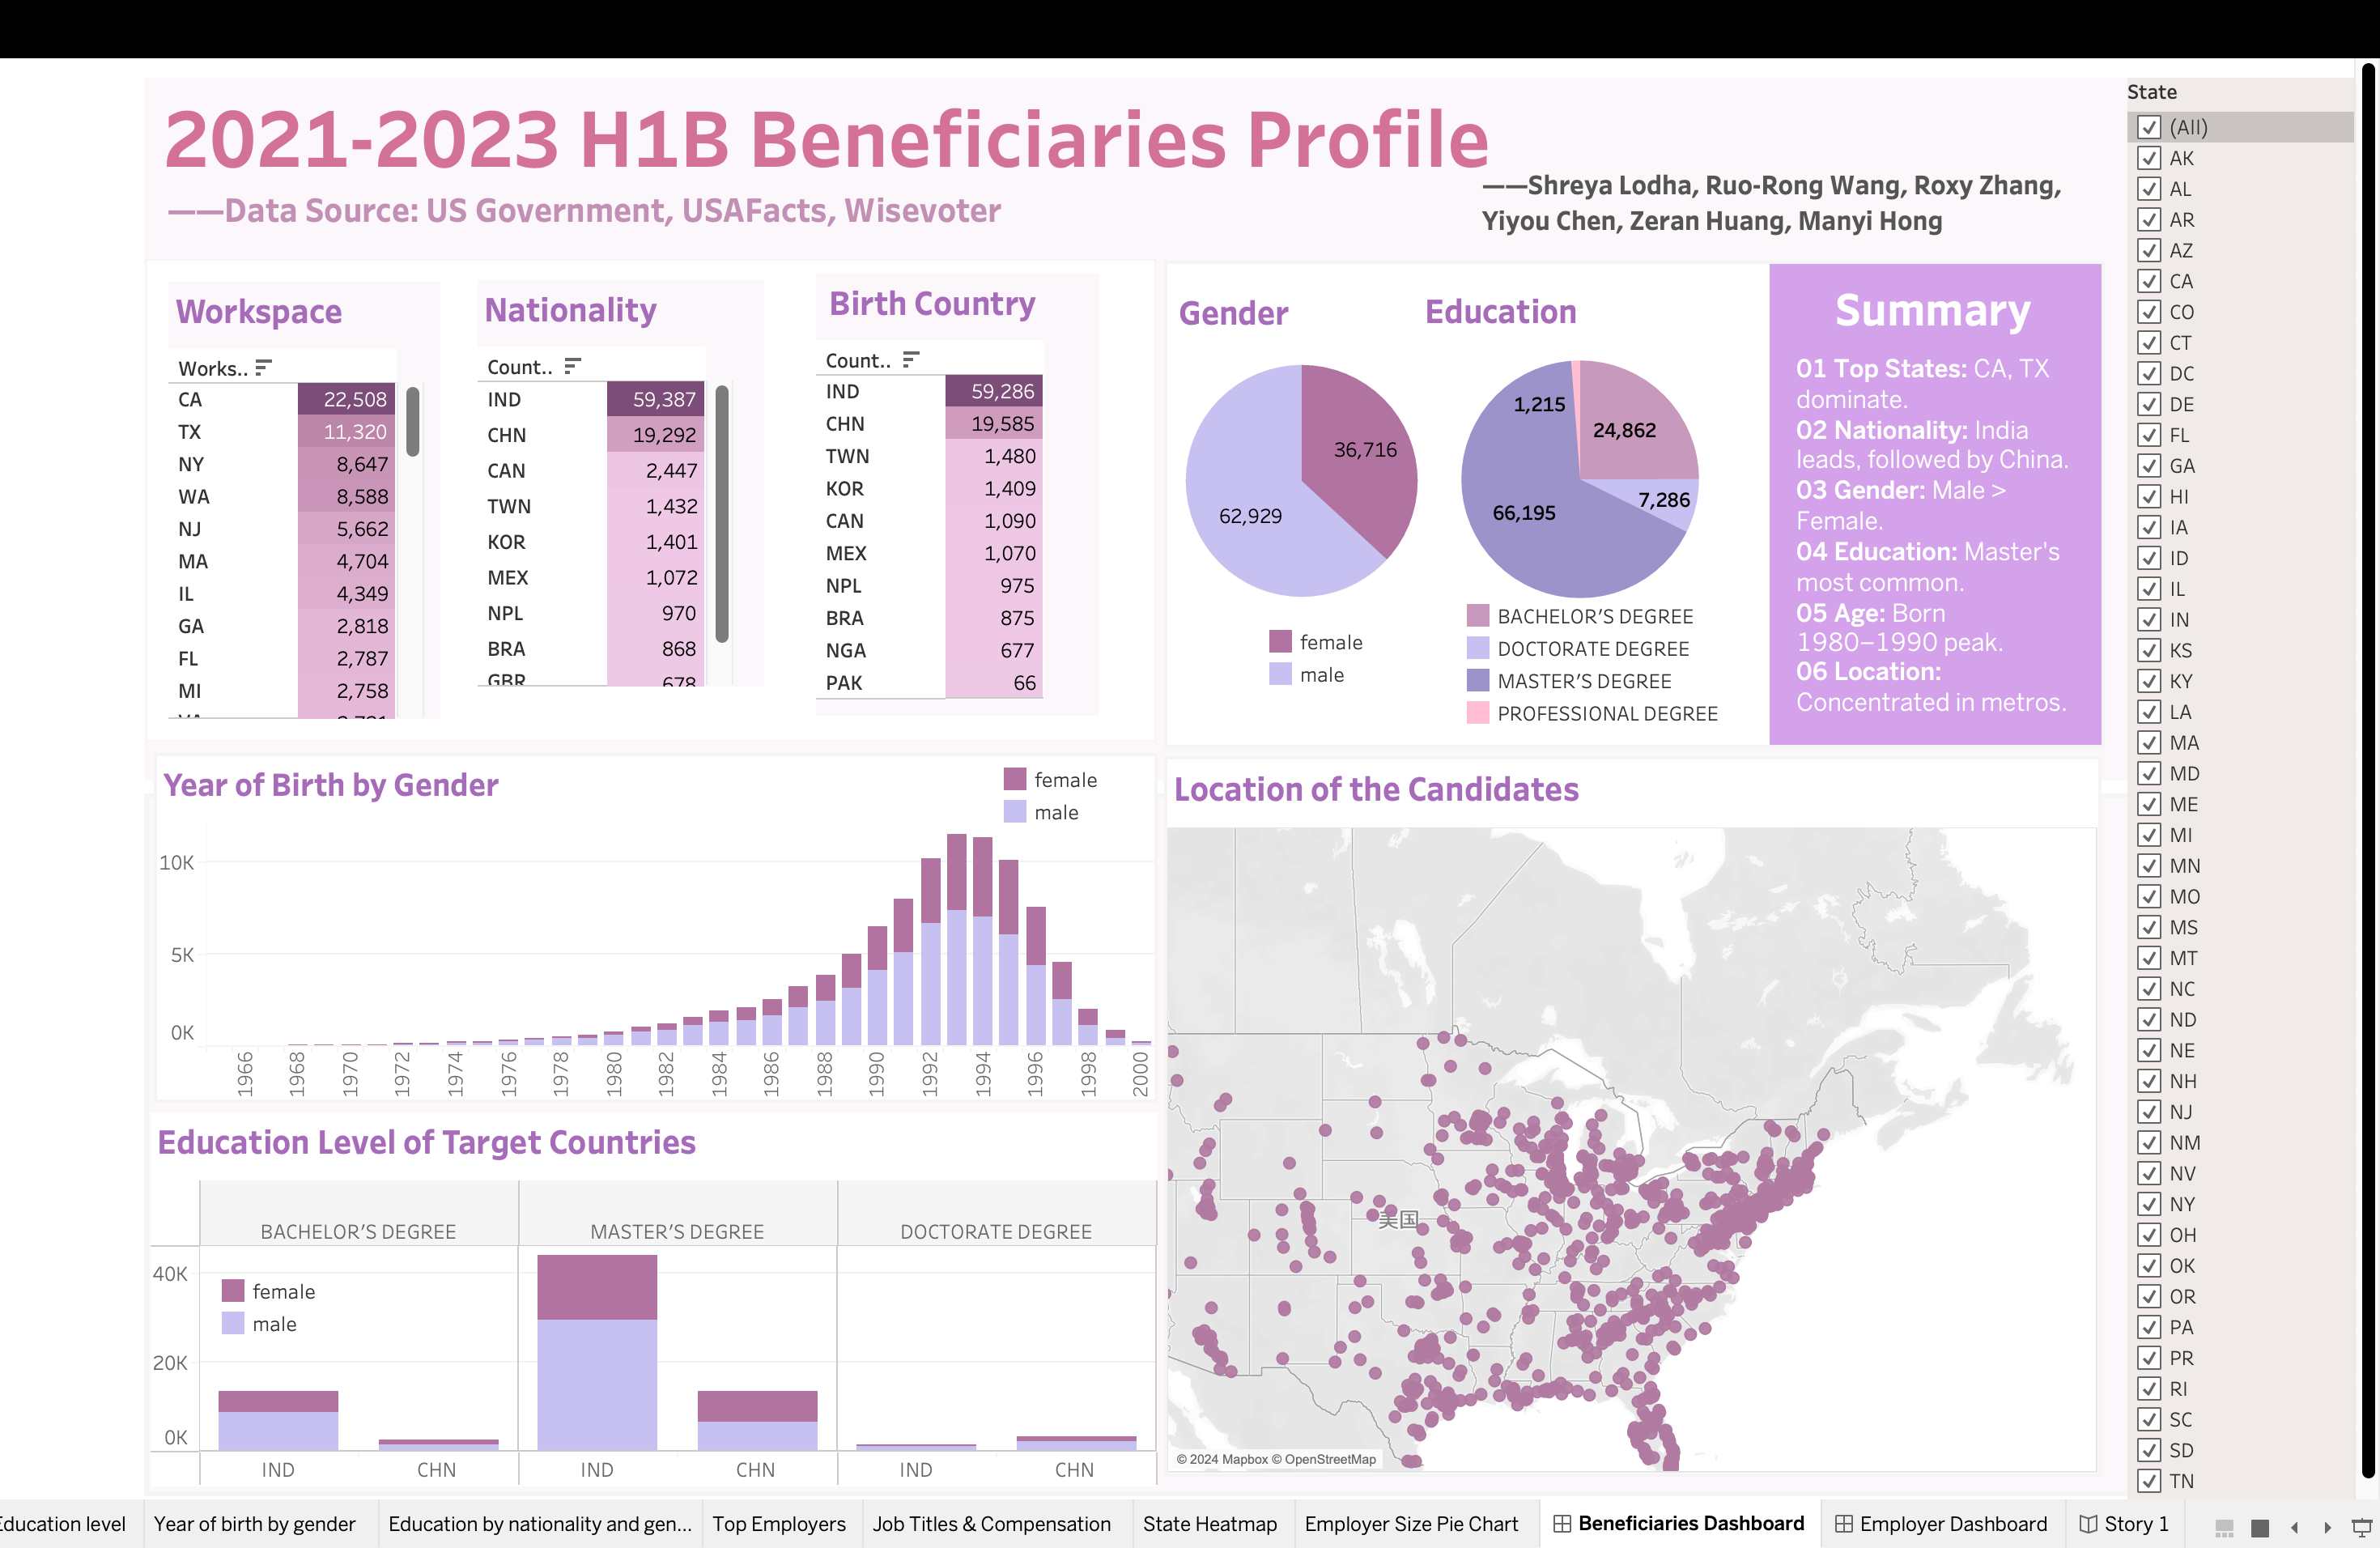

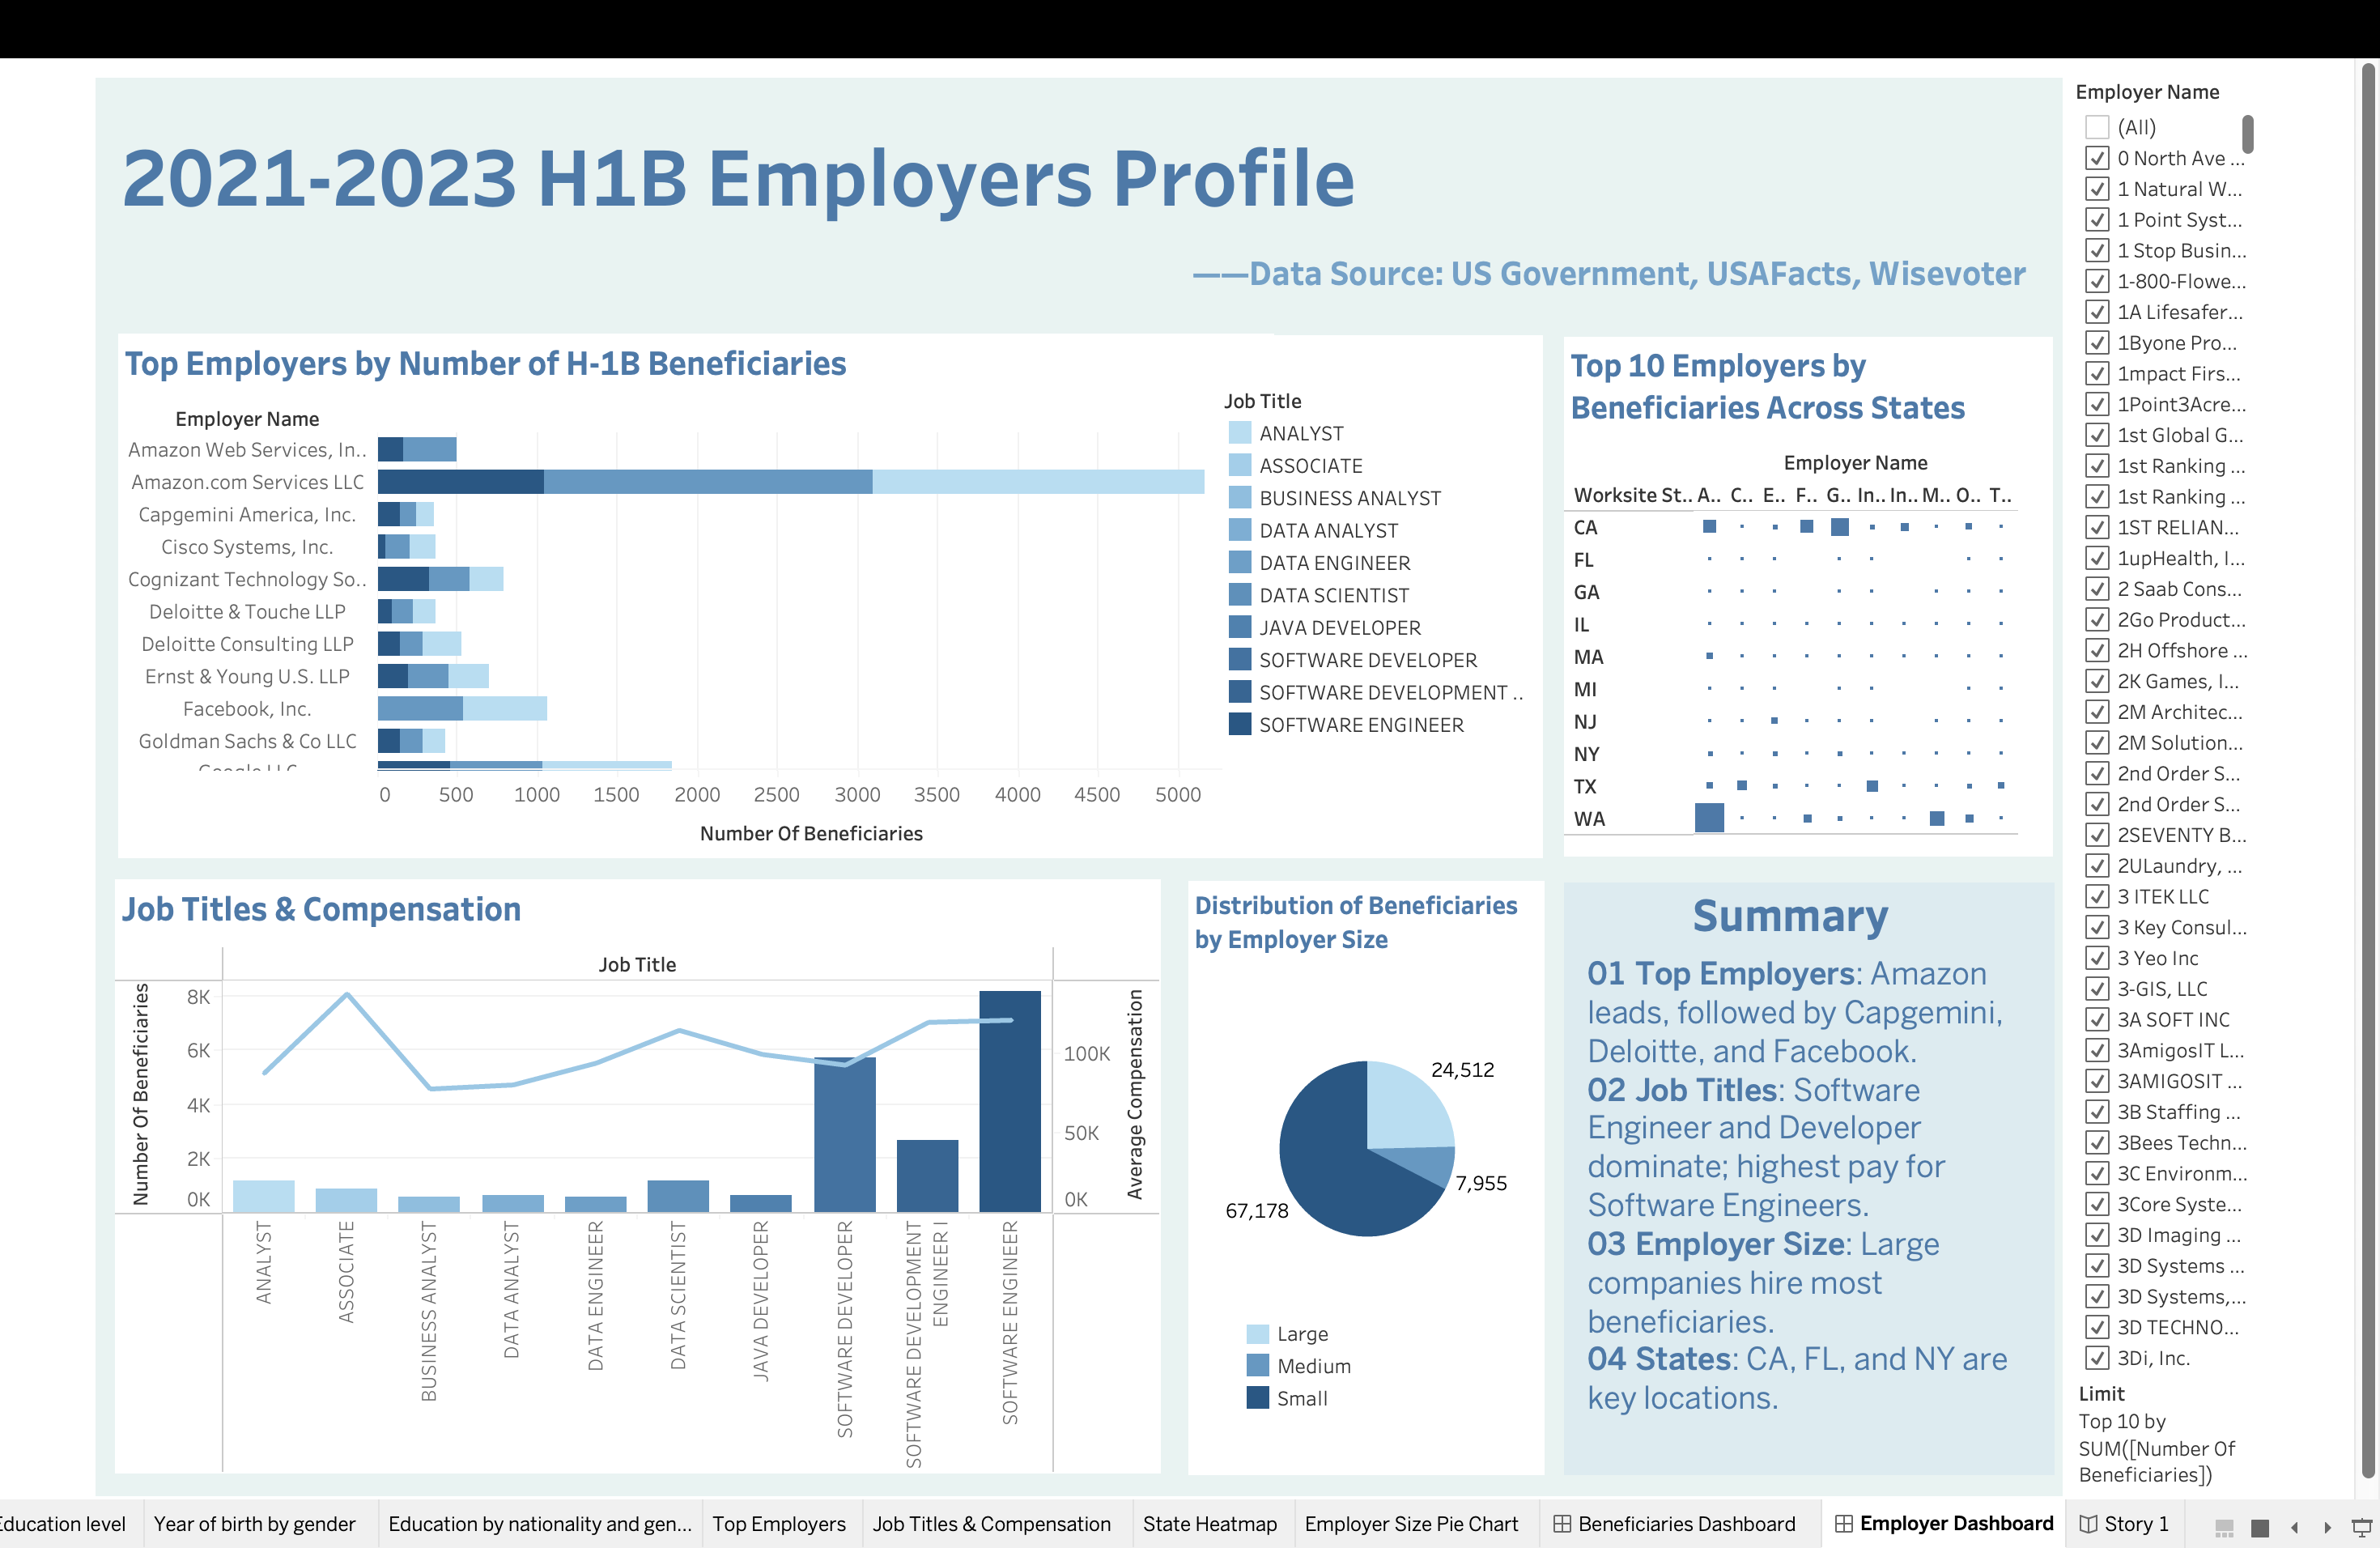

**Entity Relationship Diagram**

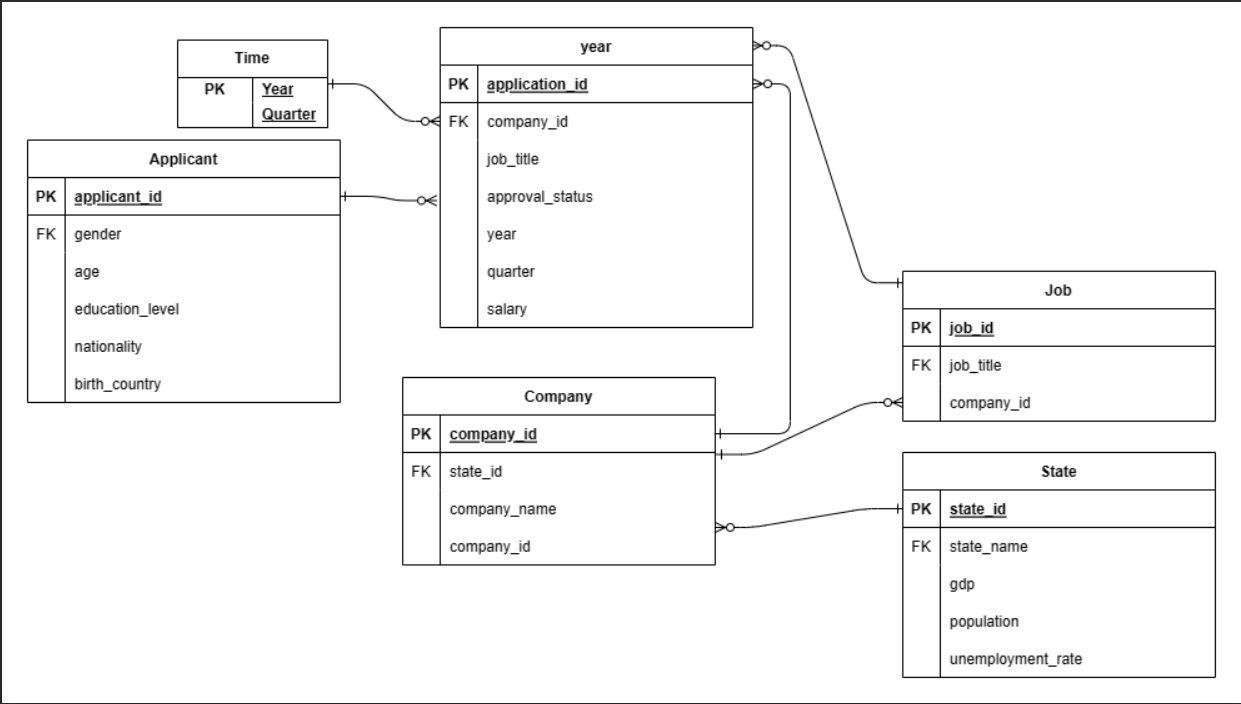

## Data Cleaning

In [ ]:
from google.cloud import bigquery
client = bigquery.Client()


Checking null columns - 2021

In [ ]:
%%bigquery
SELECT
COUNT(CASE WHEN `FULL_TIME_IND` IS NULL THEN 1 END) AS missing_column1,
COUNT(CASE WHEN `WAGE_AMT` IS NULL THEN 1 END) AS missing_column2,
COUNT(CASE WHEN `WAGE_UNIT` IS NULL THEN 1 END) AS missing_column3,
COUNT(CASE WHEN `S1Q1B` IS NULL THEN 1 END) AS missing_column4,
COUNT(CASE WHEN `T_U_VAWA_FLAG` IS NULL THEN 1 END) AS missing_column5,
FROM `ba775-project-team-6.h1b_dataset.2021`

Query is running:   0%|          |

Downloading:   0%|          |

,missing_column1,missing_column2,missing_column3,missing_column4,missing_column5
0,269377,269377,269377,269377,269377


Deleting null columns - 2021

In [ ]:
%%bigquery
ALTER TABLE `ba775-project-team-6.h1b_dataset.2021`
DROP COLUMN `FULL_TIME_IND`,
DROP COLUMN `WAGE_AMT`,
DROP COLUMN `WAGE_UNIT`,
DROP COLUMN `S1Q1B`,
DROP COLUMN `T_U_VAWA_FLAG`

Query is running:   0%|          |

""


Checking null rows - 2021

In [ ]:
%%bigquery
DECLARE null_check_query STRING;

SET null_check_query = (
  SELECT 'SELECT * FROM `ba775-project-team-6.h1b_dataset.2021` WHERE ' ||
         STRING_AGG("`" || column_name || "` IS NULL", " OR ")
  FROM `ba775-project-team-6.h1b_dataset.INFORMATION_SCHEMA.COLUMNS`
  WHERE table_name = '2021'
);

EXECUTE IMMEDIATE null_check_query;

Query is running:   0%|          |

Downloading:   0%|          |

,bcn,country_of_birth,country_of_nationality,ben_date_of_birth,ben_year_of_birth,gender,employer_name,FEIN,mail_addr,city,...,NUM_OF_EMP_IN_US,S1Q1A,BEN_EDUCATION_CODE,ED_LEVEL_DEFINITION,BEN_PFIELD_OF_STUDY,BEN_COMP_PAID,DOT_CODE,NAICS_CODE,S3Q1,S4Q1
0,(b)(6),CHN,CHN,(b)(6),1981,male,D&R I.P. Law Firm,453745389,108 N Ynez Ave,Monterey Park,...,None,None,None,None,None,None,None,None,None,None
1,(b)(6),PAK,PAK,(b)(6),1993,male,Crorama Inc.,208487164,391 Thor Pl,Brea,...,None,None,None,None,None,None,None,None,None,None
2,(b)(6),CHN,CHN,(b)(6),1993,female,"Becton, Dickinson and Company",220760120,1 Becton Dr,Franklin Lks,...,None,None,None,None,None,None,None,None,None,None
3,(b)(6),IND,IND,(b)(6),1991,female,Visa Technology & Operations LLC,743070018,900 Metro Center Blvd.,Foster City,...,None,None,None,None,None,None,None,None,None,None
4,(b)(6),IND,IND,(b)(6),1994,female,Puja Holdings LLC,454016252,51 Gate House Rd,Chestnut Hill,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230674,(b)(6),IND,IND,(b)(6),1983,male,Cognizant Technology Solutions US Corp,133924155,211 Quality Circle,College Station,...,0,Y,F,BACHELOR'S DEGREE,ELECTRONIC ENGINEERING,104419,033,541512,B,None
230675,(b)(6),IND,IND,(b)(6),1993,male,Cognizant Technology Solutions US Corp,133924155,211 Quality Circle,College Station,...,37131,Y,G,MASTER'S DEGREE,COMP SCI,83242,030,541512,B,Y
230676,(b)(6),IND,IND,(b)(6),1992,male,Cognizant Technology Solutions US Corp,133924155,211 Quality Circle,College Station,...,0,Y,G,MASTER'S DEGREE,COMPUTER SCIENCE,93600,030,541512,B,Y
230677,(b)(6),IND,IND,(b)(6),1992,male,Cognizant Technology Solutions US Corp,133924155,211 Quality Circle,College Station,...,0,Y,G,MASTER'S DEGREE,SYSS MGT/INFO SYSS,96408,033,541512,M,Y


Deleting null rows - 2021

In [ ]:
%%bigquery
DECLARE delete_null_query STRING;
SET delete_null_query = (
  SELECT 'DELETE FROM `ba775-project-team-6.h1b_dataset.2021` WHERE ' ||
         STRING_AGG("`" || column_name || "` IS NULL", " OR ")
  FROM `ba775-project-team-6.h1b_dataset.INFORMATION_SCHEMA.COLUMNS`
  WHERE table_name = '2021'
);
EXECUTE IMMEDIATE delete_null_query;
SELECT COUNT(*) AS remaining_rows
FROM `ba775-project-team-6.h1b_dataset.2021`;

Query is running:   0%|          |

Downloading:   0%|          |

,remaining_rows
0,38746


Checking null columns - 2022

In [ ]:
%%bigquery
SELECT
COUNT(CASE WHEN `FULL_TIME_IND` IS NULL THEN 1 END) AS missing_column1,
COUNT(CASE WHEN `WAGE_AMT` IS NULL THEN 1 END) AS missing_column2,
COUNT(CASE WHEN `WAGE_UNIT` IS NULL THEN 1 END) AS missing_column3,
COUNT(CASE WHEN `S1Q1B` IS NULL THEN 1 END) AS missing_column4,
COUNT(CASE WHEN `T_U_VAWA_FLAG` IS NULL THEN 1 END) AS missing_column5,
FROM `ba775-project-team-6.h1b_dataset.2022`

Query is running:   0%|          |

Downloading:   0%|          |

,missing_column1,missing_column2,missing_column3,missing_column4,missing_column5
0,301419,301419,301419,301419,301419


Deleting null columns - 2022

In [ ]:
%%bigquery
ALTER TABLE `ba775-project-team-6.h1b_dataset.2022`
DROP COLUMN `FULL_TIME_IND`,
DROP COLUMN `WAGE_AMT`,
DROP COLUMN `WAGE_UNIT`,
DROP COLUMN `S1Q1B`,
DROP COLUMN `T_U_VAWA_FLAG`

Query is running:   0%|          |

""


Checking null rows - 2022

In [ ]:
%%bigquery
DECLARE null_check_query STRING;

SET null_check_query = (
  SELECT 'SELECT * FROM `ba775-project-team-6.h1b_dataset.2022` WHERE ' ||
         STRING_AGG("`" || column_name || "` IS NULL", " OR ")
  FROM `ba775-project-team-6.h1b_dataset.INFORMATION_SCHEMA.COLUMNS`
  WHERE table_name = '2022'
);

EXECUTE IMMEDIATE null_check_query;

Query is running:   0%|          |

Downloading:   0%|          |

,bcn,country_of_birth,country_of_nationality,ben_date_of_birth,ben_year_of_birth,gender,employer_name,FEIN,mail_addr,city,...,NUM_OF_EMP_IN_US,S1Q1A,BEN_EDUCATION_CODE,ED_LEVEL_DEFINITION,BEN_PFIELD_OF_STUDY,BEN_COMP_PAID,DOT_CODE,NAICS_CODE,S3Q1,S4Q1
0,(b)(6),IND,IND,(b)(6),1991,male,Client Software Services LLC.,460525861,101 Lakeforest Blvd,Gaithersburg,...,None,None,None,None,None,None,None,None,None,None
1,(b)(6),IND,IND,(b)(6),1995,male,"Primera Technology, Inc.",411899601,2 Carlson Pkwy N Ste 375,Plymouth,...,None,None,None,None,None,None,None,None,None,None
2,(b)(6),IND,IND,(b)(6),1989,male,SOFTWARE ENTERPRISE LLC,260452051,360 Bloomfield Ave,Windsor,...,None,None,None,None,None,None,None,None,None,None
3,(b)(6),IND,IND,(b)(6),1992,male,TAG Cyber LLC,811549893,9 Camelot Dr,Byram Twp,...,None,None,None,None,None,None,None,None,None,None
4,(b)(6),IND,IND,(b)(6),1980,male,Bonzer LLC,862091181,650 Warrenville Rd,Lisle,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264252,(b)(6),IND,IND,(b)(6),1987,male,Cognizant Technology Solutions US Corp,133924155,211 Quality Circle,College Station,...,0,Y,F,BACHELOR'S DEGREE,INFORMATION TECHNOLOGY,114067,030,541512,B,Y
264253,(b)(6),IND,IND,(b)(6),1989,female,Cognizant Technology Solutions US Corp,133924155,211 Quality Circle,College Station,...,0,Y,F,BACHELOR'S DEGREE,ELECTRONIC ENGINEERING,72550,030,541512,B,Y
264254,(b)(6),IND,IND,(b)(6),1988,male,Cognizant Technology Solutions US Corp,133924155,211 Quality Circle,College Station,...,32249,Y,F,BACHELOR'S DEGREE,ELECTRONIC ENGINEERING,84198,030,541512,B,Y
264255,(b)(6),IND,IND,(b)(6),1986,male,Cognizant Technology Solutions US Corp,133924155,211 Quality Circle,College Station,...,0,Y,F,BACHELOR'S DEGREE,COMP INFO SYSS,75213,030,541512,B,Y


Deleting null rows - 2022

In [ ]:
%%bigquery
DECLARE delete_null_query STRING;
SET delete_null_query = (
  SELECT 'DELETE FROM `ba775-project-team-6.h1b_dataset.2022` WHERE ' ||
         STRING_AGG("`" || column_name || "` IS NULL", " OR ")
  FROM `ba775-project-team-6.h1b_dataset.INFORMATION_SCHEMA.COLUMNS`
  WHERE table_name = '2022'
);
EXECUTE IMMEDIATE delete_null_query;
SELECT COUNT(*) AS remaining_rows
FROM `ba775-project-team-6.h1b_dataset.2022`;

Query is running:   0%|          |

Downloading:   0%|          |

,remaining_rows
0,37191


Checking null columns - 2023

In [ ]:
%%bigquery
SELECT
COUNT(CASE WHEN `FULL_TIME_IND` IS NULL THEN 1 END) AS missing_column1,
COUNT(CASE WHEN `WAGE_AMT` IS NULL THEN 1 END) AS missing_column2,
COUNT(CASE WHEN `WAGE_UNIT` IS NULL THEN 1 END) AS missing_column3,
COUNT(CASE WHEN `S1Q1B` IS NULL THEN 1 END) AS missing_column4,
COUNT(CASE WHEN `T_U_VAWA_FLAG` IS NULL THEN 1 END) AS missing_column5,
FROM `ba775-project-team-6.h1b_dataset.2023`

Query is running:   0%|          |

Downloading:   0%|          |

,missing_column1,missing_column2,missing_column3,missing_column4,missing_column5
0,425134,380369,380356,414127,474384


Deleting null columns - 2023

In [ ]:
%%bigquery
ALTER TABLE `ba775-project-team-6.h1b_dataset.2023`
DROP COLUMN `FULL_TIME_IND`,
DROP COLUMN `WAGE_AMT`,
DROP COLUMN `WAGE_UNIT`,
DROP COLUMN `S1Q1B`,
DROP COLUMN `T_U_VAWA_FLAG`

Query is running:   0%|          |

""


Checking null rows - 2023

In [ ]:
%%bigquery
DECLARE null_check_query STRING;

SET null_check_query = (
  SELECT 'SELECT * FROM `ba775-project-team-6.h1b_dataset.2023` WHERE ' ||
         STRING_AGG("`" || column_name || "` IS NULL", " OR ")
  FROM `ba775-project-team-6.h1b_dataset.INFORMATION_SCHEMA.COLUMNS`
  WHERE table_name = '2023'
);

EXECUTE IMMEDIATE null_check_query

Query is running:   0%|          |

Downloading:   0%|          |

,bcn,country_of_birth,country_of_nationality,ben_date_of_birth,ben_year_of_birth,gender,employer_name,FEIN,mail_addr,city,...,NUM_OF_EMP_IN_US,S1Q1A,BEN_EDUCATION_CODE,ED_LEVEL_DEFINITION,BEN_PFIELD_OF_STUDY,BEN_COMP_PAID,DOT_CODE,NAICS_CODE,S3Q1,S4Q1
0,(b)(6),IND,IND,(b)(6),1991,female,"ArisGlobal, LLC.",043604669,3119 Ponce De Leon Blvd,Coral Gables,...,None,None,None,None,None,None,None,None,None,None
1,(b)(6),IND,IND,(b)(6),1994,male,SDVS Technologies LLC,453867624,3535 Firewheel Dr,Flower Mound,...,None,None,None,None,None,None,None,None,None,None
2,(b)(6),IND,IND,(b)(6),1992,female,CONCH TECHNOLOGIES INC,201105490,6750 Poplar Ave,Memphis,...,None,None,None,None,None,None,None,None,None,None
3,(b)(6),IND,IND,(b)(6),1984,female,SVATS Inc,465653357,589 Carle Ave,Lewis Center,...,None,None,None,None,None,None,None,None,None,None
4,(b)(6),IND,IND,(b)(6),1991,male,MOBILE PROGRAMMING LLC,272405855,30300 Agoura Rd,Agoura Hills,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450594,(b)(6),IND,IND,(b)(6),1990,male,Cognizant Technology Solutions US Corp,133924155,211 Quality Circle,College Station,...,32249,Y,F,BACHELOR'S DEGREE,ELECTRONIC ENGINEERING,103126,030,541512,B,N
450595,(b)(6),IND,IND,(b)(6),1986,male,Cognizant Technology Solutions US Corp,133924155,211 Quality Circle,College Station,...,32249,Y,None,None,APPLIED COMPUTER SCIENCE,90397,030,541512,B,Y
450596,(b)(6),IND,IND,(b)(6),1991,male,Cognizant Technology Solutions US Corp,133924155,211 Quality Circle,College Station,...,32249,Y,F,BACHELOR'S DEGREE,COMPUTER ENGINEERING,76856,033,541512,B,N
450597,(b)(6),IND,IND,(b)(6),1988,male,Cognizant Technology Solutions US Corp,133924155,211 Quality Circle,College Station,...,32249,Y,None,None,APPLIED COMPUTER SCIENCE,85301,030,541512,B,N


Deleting null rows - 2023

In [ ]:
%%bigquery
DECLARE delete_null_query STRING;
SET delete_null_query = (
  SELECT 'DELETE FROM `ba775-project-team-6.h1b_dataset.2023` WHERE ' ||
         STRING_AGG("`" || column_name || "` IS NULL", " OR ")
  FROM `ba775-project-team-6.h1b_dataset.INFORMATION_SCHEMA.COLUMNS`
  WHERE table_name = '2023'
);
EXECUTE IMMEDIATE delete_null_query;
SELECT COUNT(*) AS remaining_rows
FROM `ba775-project-team-6.h1b_dataset.2023`;

Query is running:   0%|          |

Downloading:   0%|          |

,remaining_rows
0,23823


## Merging Datasets

Left join for 2021 H-1B and state data

In [ ]:
%%bigquery
SELECT *
FROM ba775-project-team-6.h1b_dataset.2021 AS h
LEFT JOIN ba775-project-team-6.state_data.2021 AS s
ON h.state = s.`id of state`;


Query is running:   0%|          |

Downloading:   0%|          |

,bcn,country_of_birth,country_of_nationality,ben_date_of_birth,ben_year_of_birth,gender,employer_name,FEIN,mail_addr,city,...,S4Q1,id of state,state_1,GDP of state,GDP ratio of state,GDP per capital of state,Median Household Income by State,Unemployment Rates of state,population of state,population ratio of state
0,(b)(6),ZAF,ZAF,(b)(6),1976,male,Amazon.com Services LLC,820544687,2201 Westlake Ave,Seattle,...,N,WA,Washington,6.7749E+11,2.92%,"73,755",98150,5.20%,7741433,2.33%
1,(b)(6),CHN,CHN,(b)(6),1988,male,SolidEnergy Systems LLC,455099788,35 Cabot Road,Woburn,...,N,MA,Massachusetts,6.41332E+11,2.77%,"83,593",96940,5.40%,6991951,2.11%
2,(b)(6),BRA,NZL,(b)(6),1975,male,WEX Inc.,010526993,97 Darling Ave,S Portland,...,N,ME,Maine,77963300000,0.34%,"58,272",79660,4.70%,1378787,0.42%
3,(b)(6),FRA,FRA,(b)(6),1988,male,Airbus Americas Inc.,133243459,2550 Wasser Ter,Herndon,...,N,VA,Virginia,6.04958E+11,2.61%,"66,190",89890,3.90%,8657348,2.61%
4,(b)(6),SAU,BGD,(b)(6),1994,male,RANE PRECISION DIE CASTING INC,611154640,232 Hopkinsville Rd,Russellville,...,N,KY,Kentucky,2.37182E+11,1.02%,"51,298",62290,4.50%,4507600,1.36%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38741,(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),...,(b)(3) (b)(6) (b)(7)(c),None,None,None,None,None,None,None,None,None
38742,(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),...,(b)(3) (b)(6) (b)(7)(c),None,None,None,None,None,None,None,None,None
38743,(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),...,(b)(3) (b)(6) (b)(7)(c),None,None,None,None,None,None,None,None,None
38744,(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),...,(b)(3) (b)(6) (b)(7)(c),None,None,None,None,None,None,None,None,None


Left join for 2022 H-1B and state data

In [ ]:
%%bigquery
SELECT *
FROM ba775-project-team-6.h1b_dataset.2022 AS h
LEFT JOIN ba775-project-team-6.state_data.2022 AS s
ON h.state = s.`id of state`;


Query is running:   0%|          |

Downloading:   0%|          |

,bcn,country_of_birth,country_of_nationality,ben_date_of_birth,ben_year_of_birth,gender,employer_name,FEIN,mail_addr,city,...,S4Q1,id of state,state_1,GDP of state,GDP ratio of state,GDP per capital of state,Median Household Income by State,Unemployment Rates of state,population of state,population ratio of state
0,(b)(6),IND,IND,(b)(6),1982,male,"Capgemini America, Inc.",222575929,333 West Wacker Drive,Chicago,...,Y,IL,Illinois,1033310100000,4.08%,68822,"81,120",4.60%,12582515,3.78%
1,(b)(6),BRA,BRA,(b)(6),1978,male,"Tetra Pak, Inc.",751537534,3300 Airport Road,Denton,...,Y,TX,Texas,2355959700000,9.31%,61985,"77,600",3.90%,30029848,9.01%
2,(b)(6),ITA,ITA,(b)(6),1969,male,"Tetra Pak, Inc.",751537534,3300 Airport Road,Denton,...,Y,TX,Texas,2355959700000,9.31%,61985,"77,600",3.90%,30029848,9.01%
3,(b)(6),IND,IND,(b)(6),1992,male,SOFTWARE ENTERPRISE LLC,260452051,360 Bloomfield Ave,Windsor,...,Y,CT,Connecticut,321844600000,1.27%,84972,"94,340",4.10%,3608706,1.08%
4,(b)(6),IND,IND,(b)(6),1992,male,IT Division Inc,371528325,5955 Parkway North Blvd,Cumming,...,Y,GA,Georgia,755697900000,2.99%,57129,"70,420",3.10%,10913150,3.27%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37186,(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),...,(b)(3) (b)(6) (b)(7)(c),None,None,None,None,None,None,None,None,None
37187,(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),...,(b)(3) (b)(6) (b)(7)(c),None,None,None,None,None,None,None,None,None
37188,(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),...,(b)(3) (b)(6) (b)(7)(c),None,None,None,None,None,None,None,None,None
37189,(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),...,(b)(3) (b)(6) (b)(7)(c),None,None,None,None,None,None,None,None,None


Left join for 2023 H-1B and state data

In [ ]:
%%bigquery
SELECT *
FROM ba775-project-team-6.h1b_dataset.2023 AS h
LEFT JOIN ba775-project-team-6.state_data.2023 AS s
ON h.state = s.`id of state`;

Query is running:   0%|          |

Downloading:   0%|          |

,bcn,country_of_birth,country_of_nationality,ben_date_of_birth,ben_year_of_birth,gender,employer_name,FEIN,mail_addr,city,...,S4Q1,id of state,state_1,GDP of state,GDP ratio of state,GDP per capital of state,Median Household Income by State,Unemployment Rates of state,population of state,population ratio of state
0,(b)(6),IND,IND,(b)(6),1975,male,TRINCHESE IRON WORKS & CONSTRUCTION INC,200236706,234 Belmont Ave,Brooklyn,...,N,NY,New York,1775710000000,8.25%,110980,"81,600",4.00%,19571216,5.93%
1,(b)(6),MYS,MYS,(b)(6),1984,female,"PayPal, Inc.",770510487,2211 N 1st St,San Jose,...,N,CA,California,3233150000000,15.03%,99329,"89,870",4.80%,38965193,11.81%
2,(b)(6),GBR,GBR,(b)(6),1982,male,"Red Box Recorders, Ltd.",981226347,450 Lexington Avenue,New York,...,N,NY,New York,1775710000000,8.25%,110980,"81,600",4.00%,19571216,5.93%
3,(b)(6),IND,IND,(b)(6),1989,female,R1 RCM Inc.,020698101,"Triangle Plaza, 8750 W. Bryn Mawr",Chicago,...,N,IL,Illinois,875510000000,4.07%,87520,"87,820",4.50%,12549689,3.81%
4,(b)(6),KOR,KOR,(b)(6),1992,male,JDC HEALTHCARE PLLC,752518300,3030 Lbj Fwy.,Dallas,...,N,TX,Texas,2032930000000,9.45%,84708,"79,060",3.90%,30503301,9.25%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23818,(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),...,(b)(3) (b)(6) (b)(7)(c),None,None,None,None,None,None,None,None,None
23819,(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),...,(b)(3) (b)(6) (b)(7)(c),None,None,None,None,None,None,None,None,None
23820,(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),...,(b)(3) (b)(6) (b)(7)(c),None,None,None,None,None,None,None,None,None
23821,(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),...,(b)(3) (b)(6) (b)(7)(c),None,None,None,None,None,None,None,None,None


Combining all data for 2021, 2022, 2023

In [ ]:
%%bigquery h1b_state_data
SELECT *
FROM (
    SELECT *
    FROM `ba775-project-team-6.h1b_dataset.2021` AS h
    LEFT JOIN `ba775-project-team-6.state_data.2021` AS s
    ON h.state = s.`id of state`

    UNION ALL

    SELECT *
    FROM `ba775-project-team-6.h1b_dataset.2022` AS h
    LEFT JOIN `ba775-project-team-6.state_data.2022` AS s
    ON h.state = s.`id of state`

    UNION ALL

    SELECT *
    FROM `ba775-project-team-6.h1b_dataset.2023` AS h
    LEFT JOIN `ba775-project-team-6.state_data.2023` AS s
    ON h.state = s.`id of state`
)
AS h1b_state_data

Query is running:   0%|          |

Downloading:   0%|          |

## Beneficiary Demographics

### Gender

In [ ]:
query = """
SELECT
    gender,
    COUNT(*) AS approved_count,
    ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (), 2) AS gender_percentage
FROM
    (
        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2021` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2021` AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'

        UNION ALL

        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2022` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2022` AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'

        UNION ALL

        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2023` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2023` AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'
    ) AS h
GROUP BY gender
ORDER BY gender_percentage DESC;
"""

gender = client.query(query).to_dataframe()
gender.head()

,gender,approved_count,gender_percentage
0,male,62823,63.16
1,female,36647,36.84


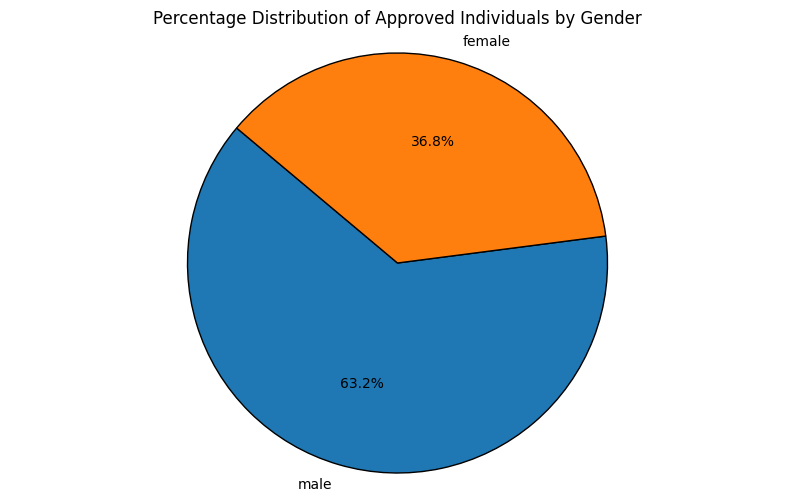

In [ ]:
import matplotlib.pyplot as plt
gender_groups = ['male', 'female']
percentages = [63.16, 36.84]
plt.figure(figsize=(10, 6))
plt.pie(percentages, labels=gender_groups, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Percentage Distribution of Approved Individuals by Gender')
plt.axis('equal')
plt.show()


The pie chart shows the gender distribution among approved individuals, with males comprising 63.2% and females making up 36.8% of the approved population. This indicates a notable imbalance in approvals between males and females, suggesting that males are more likely to be approved compared to females in this dataset. The difference could point to underlying factors affecting approval rates, such as biases, application trends, or differences in qualifications, which may need further investigation to understand the cause of this disparity. It highlights the need to analyze whether systemic issues or other factors contribute to this unequal distribution in approval outcomes.

### Age

In [ ]:
query = """
WITH filtered_data AS (
    SELECT *,
           SAFE_CAST(ben_year_of_birth AS INT64) AS year_of_birth
    FROM (
        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2021` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2021` AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'

        UNION ALL

        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2022` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2022` AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'

        UNION ALL

        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2023` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2023` AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'
    )
    WHERE REGEXP_CONTAINS(ben_year_of_birth, r'^\d+$')
),
age_group_data AS (
    SELECT *,
           CASE
               WHEN (EXTRACT(YEAR FROM CURRENT_DATE()) - year_of_birth) < 25 THEN 'Under 25'
               WHEN (EXTRACT(YEAR FROM CURRENT_DATE()) - year_of_birth) BETWEEN 25 AND 34 THEN '25-34'
               WHEN (EXTRACT(YEAR FROM CURRENT_DATE()) - year_of_birth) BETWEEN 35 AND 44 THEN '35-44'
               WHEN (EXTRACT(YEAR FROM CURRENT_DATE()) - year_of_birth) BETWEEN 45 AND 54 THEN '45-54'
               WHEN (EXTRACT(YEAR FROM CURRENT_DATE()) - year_of_birth) BETWEEN 55 AND 64 THEN '55-64'
               ELSE '65 and above'
           END AS age_group
    FROM filtered_data
)

SELECT age_group,
       COUNT(*) AS approved_count,
       ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (), 2) AS age_group_percentage
FROM age_group_data
GROUP BY age_group
ORDER BY age_group_percentage DESC;
"""
result = client.query(query).to_dataframe()
result.head()

,age_group,approved_count,age_group_percentage
0,25-34,72443,72.83
1,35-44,23279,23.40
2,45-54,3055,3.07
3,55-64,364,0.37
4,Under 25,296,0.30


The horizontal bar chart shows the percentage distribution of approved individuals across different age groups. It highlights that the vast majority of approvals fall within the 25-34 age group, accounting for 72.83% of all approvals. The next largest group is 35-44, with 23.40%, while other age groups such as 45-54, 55-64, and those under 25 have significantly smaller shares, representing only 3.07%, 0.37%, and 0.30%, respectively. This indicates that younger individuals, particularly those in the 25-34 and 35-44 age groups, dominate the approved category. The relatively lower percentages for other age groups suggest potential biases or trends favoring younger applicants or possibly higher application numbers from those age groups. Further investigation may be needed to determine if this trend is influenced by applicant demographics, qualifications, or external factors.

### Birth Countries

In [ ]:
%%bigquery
SELECT
    h.country_of_birth AS Birth_Country,
    COUNT(*) AS Birth_Count
FROM
    (
        SELECT *
        FROM ba775-project-team-6.h1b_dataset.2021 AS h
        LEFT JOIN ba775-project-team-6.state_data.2021 AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'

        UNION ALL

        SELECT *
        FROM ba775-project-team-6.h1b_dataset.2022 AS h
        LEFT JOIN ba775-project-team-6.state_data.2022 AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'

        UNION ALL

        SELECT *
        FROM ba775-project-team-6.h1b_dataset.2023 AS h
        LEFT JOIN ba775-project-team-6.state_data.2023 AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'
    ) AS h
GROUP BY
    h.country_of_birth
ORDER BY
    Birth_Count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,Birth_Country,Birth_Count
0,IND,59363
1,CHN,19693
2,TWN,1492
3,KOR,1418
4,CAN,1090
...,...,...
181,TCA,1
182,LSO,1
183,DJI,1
184,KNA,1


In [ ]:
%%bigquery
WITH filtered_data AS (
    SELECT *,
           SAFE_CAST(ben_year_of_birth AS INT64) AS year_of_birth
    FROM (
        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2021` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2021` AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'

        UNION ALL

        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2022` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2022` AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'

        UNION ALL

        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2023` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2023` AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'
    )
)
SELECT *
FROM filtered_data
LIMIT 5;


Query is running:   0%|          |

Downloading:   0%|          |

,bcn,country_of_birth,country_of_nationality,ben_date_of_birth,ben_year_of_birth,gender,employer_name,FEIN,mail_addr,city,...,id of state,state_1,GDP of state,GDP ratio of state,GDP per capital of state,Median Household Income by State,Unemployment Rates of state,population of state,population ratio of state,year_of_birth
0,(b)(6),IND,IND,(b)(6),1975,male,TRINCHESE IRON WORKS & CONSTRUCTION INC,200236706,234 Belmont Ave,Brooklyn,...,NY,New York,1775710000000,8.25%,110980,"81,600",4.00%,19571216,5.93%,1975
1,(b)(6),MYS,MYS,(b)(6),1984,female,"PayPal, Inc.",770510487,2211 N 1st St,San Jose,...,CA,California,3233150000000,15.03%,99329,"89,870",4.80%,38965193,11.81%,1984
2,(b)(6),GBR,GBR,(b)(6),1982,male,"Red Box Recorders, Ltd.",981226347,450 Lexington Avenue,New York,...,NY,New York,1775710000000,8.25%,110980,"81,600",4.00%,19571216,5.93%,1982
3,(b)(6),IND,IND,(b)(6),1989,female,R1 RCM Inc.,020698101,"Triangle Plaza, 8750 W. Bryn Mawr",Chicago,...,IL,Illinois,875510000000,4.07%,87520,"87,820",4.50%,12549689,3.81%,1989
4,(b)(6),KOR,KOR,(b)(6),1992,male,JDC HEALTHCARE PLLC,752518300,3030 Lbj Fwy.,Dallas,...,TX,Texas,2032930000000,9.45%,84708,"79,060",3.90%,30503301,9.25%,1992


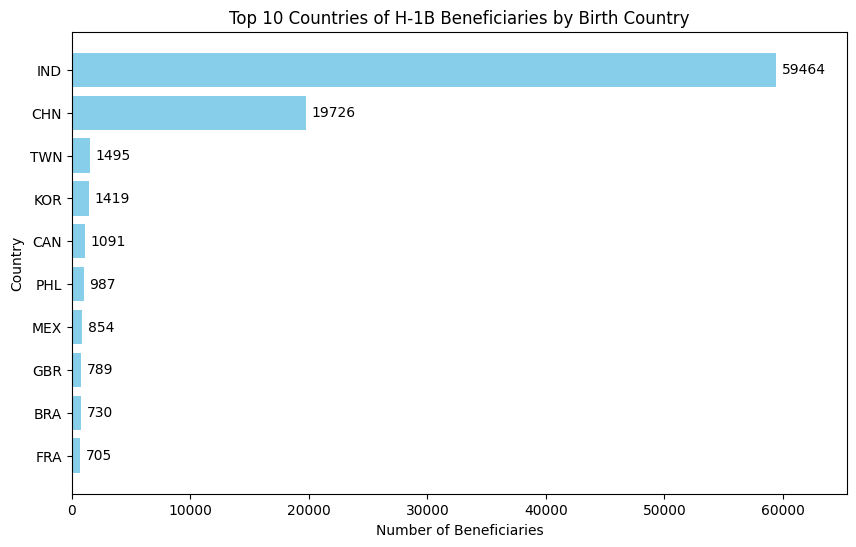

In [ ]:

import matplotlib.pyplot as plt
labels = ['IND', 'CHN', 'TWN', 'KOR', 'CAN', 'PHL', 'MEX', 'GBR', 'BRA', 'FRA']
sizes = [59464, 19726, 1495, 1419, 1091, 987, 854, 789, 730, 705]  # Replace with actual top 10 values
plt.figure(figsize=(10, 6))
bars = plt.barh(labels, sizes, color='skyblue')
plt.xlabel("Number of Beneficiaries")
plt.ylabel("Country")
plt.title("Top 10 Countries of H-1B Beneficiaries by Birth Country")
plt.gca().invert_yaxis()
for bar in bars:
    plt.text(bar.get_width() + 500, bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', va='center')

plt.xlim(0, max(sizes) * 1.1)
plt.show()

 ### Nationality

In [ ]:
%%bigquery
SELECT
    h.country_of_nationality AS Nationality,
    COUNT(*) AS Nationality_Count
FROM
    (
        SELECT *
        FROM ba775-project-team-6.h1b_dataset.2021 AS h
        LEFT JOIN ba775-project-team-6.state_data.2021 AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'

        UNION ALL

        SELECT *
        FROM ba775-project-team-6.h1b_dataset.2022 AS h
        LEFT JOIN ba775-project-team-6.state_data.2022 AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'

        UNION ALL

        SELECT *
        FROM ba775-project-team-6.h1b_dataset.2023 AS h
        LEFT JOIN ba775-project-team-6.state_data.2023 AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'
    ) AS h
GROUP BY
    h.country_of_nationality
ORDER BY
    Nationality_Count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,Nationality,Nationality_Count
0,IND,59285
1,CHN,19261
2,CAN,2443
3,TWN,1429
4,KOR,1400
...,...,...
167,QAT,1
168,MRT,1
169,VCT,1
170,undefined,1


According to the Institute of International Education's "Open Doors Report," India and China were the top two countries of origin for students studying in the United States during the 2020-2021 academic year, with 167,582 students from China and 167,582 students from India. Many international students tend to later extend their stay to pursue advanced degrees in very sought-after fields, such as engineering, computer science, and business. These are the same fields that the U.S. job market is driving up demand for with H-1B visas.

The H-1B beneficiary data heavily reflects these countries, with close to 60,000 beneficiaries from India and nearly 20,000 from China. This reflects the large pipeline of professionals coming from these countries who finally get into H-1B employment after completing their education in the U.S. Taiwan, South Korea, and even Canada all appear on the list, but with far fewer applicants, likely due to their smaller populations and/or lower numbers of students resident in the U.S. compared to India and China.

### Education

Distribution of educational level among all beneficiaries

In [ ]:
%%bigquery
SELECT
    ED_LEVEL_DEFINITION AS education_level,
    COUNT(*) AS total_approved_count,
    ROUND(COUNT(*) / SUM(COUNT(*)) OVER () * 100,2) AS approved_percentage
FROM
(
    SELECT *
    FROM ba775-project-team-6.h1b_dataset.2021 AS h
    LEFT JOIN ba775-project-team-6.state_data.2021 AS s ON h.state = s.`id of state`
    WHERE h.FIRST_DECISION = 'Approved'

    UNION ALL

    SELECT *
    FROM ba775-project-team-6.h1b_dataset.2022 AS h
    LEFT JOIN ba775-project-team-6.state_data.2022 AS s ON h.state = s.`id of state`
    WHERE h.FIRST_DECISION = 'Approved'

    UNION ALL

    SELECT *
    FROM ba775-project-team-6.h1b_dataset.2023 AS h
    LEFT JOIN ba775-project-team-6.state_data.2023 AS s ON h.state = s.`id of state`
    WHERE h.FIRST_DECISION = 'Approved'
) AS h
GROUP BY
    ED_LEVEL_DEFINITION
ORDER BY
    total_approved_count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,education_level,total_approved_count,approved_percentage
0,MASTER'S DEGREE,66089,66.44
1,BACHELOR'S DEGREE,24802,24.93
2,DOCTORATE DEGREE,7278,7.32
3,PROFESSIONAL DEGREE,1214,1.22
4,"1 OR MORE YEARS OF COLLEGE, NO DEGREE",34,0.03
5,ASSOCIATE'S DEGREE,28,0.03
6,HIGH SCHOOL GRADUATE,20,0.02
7,NO DIPLOMA,3,0.00
8,NO CODE PROVIDED OR ILLEGIBLE,1,0.00
9,"SOME COLLEGE CREDIT, BUT LESS THAN 1 YEAR",1,0.00


The distribution of educational level among beneficiaries from the top 2 countries

In [ ]:
%%bigquery
SELECT
    h.country_of_nationality AS Nationality,
    ED_LEVEL_DEFINITION AS education_level,
    COUNT(*) AS total_approved_count,
    ROUND(COUNT(*) / SUM(COUNT(*)) OVER (PARTITION BY h.country_of_nationality) * 100, 2) AS approved_percentage_nationwide
FROM
(
    SELECT *
    FROM ba775-project-team-6.h1b_dataset.2021 AS h
    LEFT JOIN ba775-project-team-6.state_data.2021 AS s ON h.state = s.`id of state`
    WHERE h.FIRST_DECISION = 'Approved' AND h.country_of_nationality IN ('IND', 'CHN')

    UNION ALL

    SELECT *
    FROM ba775-project-team-6.h1b_dataset.2022 AS h
    LEFT JOIN ba775-project-team-6.state_data.2022 AS s ON h.state = s.`id of state`
    WHERE h.FIRST_DECISION = 'Approved' AND h.country_of_nationality IN ('IND', 'CHN')

    UNION ALL

    SELECT *
    FROM ba775-project-team-6.h1b_dataset.2023 AS h
    LEFT JOIN ba775-project-team-6.state_data.2023 AS s ON h.state = s.`id of state`
    WHERE h.FIRST_DECISION = 'Approved' AND h.country_of_nationality IN ('IND', 'CHN')
) AS h
WHERE ED_LEVEL_DEFINITION IN ('MASTER\'S DEGREE', 'BACHELOR\'S DEGREE', 'DOCTORATE DEGREE', 'PROFESSIONAL DEGREE')
GROUP BY
    Nationality, ED_LEVEL_DEFINITION
ORDER BY
    Nationality, total_approved_count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,Nationality,education_level,total_approved_count,approved_percentage_nationwide
0,CHN,MASTER'S DEGREE,13307,69.14
1,CHN,DOCTORATE DEGREE,3327,17.29
2,CHN,BACHELOR'S DEGREE,2337,12.14
3,CHN,PROFESSIONAL DEGREE,275,1.43
4,IND,MASTER'S DEGREE,43953,74.16
5,IND,BACHELOR'S DEGREE,13412,22.63
6,IND,DOCTORATE DEGREE,1597,2.69
7,IND,PROFESSIONAL DEGREE,303,0.51


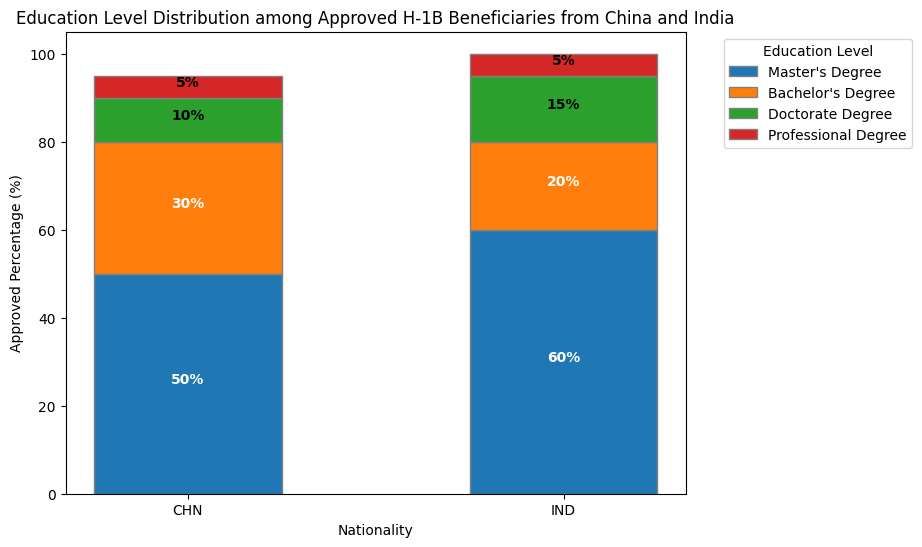

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

master = [50, 60]
bachelor = [30, 20]
doctorate = [10, 15]
professional = [5, 5]
labels = ["CHN", "IND"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
barWidth = 0.5

r = np.arange(len(labels))

plt.figure(figsize=(8, 6))
plt.bar(r, master, color=colors[0], edgecolor="grey", width=barWidth, label="Master's Degree")
plt.bar(r, bachelor, bottom=master, color=colors[1], edgecolor="grey", width=barWidth, label="Bachelor's Degree")
plt.bar(r, doctorate, bottom=np.array(master) + np.array(bachelor), color=colors[2], edgecolor="grey", width=barWidth, label="Doctorate Degree")
plt.bar(r, professional, bottom=np.array(master) + np.array(bachelor) + np.array(doctorate), color=colors[3], edgecolor="grey", width=barWidth, label="Professional Degree")

for i in range(len(r)):
    plt.text(r[i], master[i] / 2, f"{master[i]}%", ha="center", color="white", weight="bold")
    plt.text(r[i], master[i] + bachelor[i] / 2, f"{bachelor[i]}%", ha="center", color="white", weight="bold")
    plt.text(r[i], master[i] + bachelor[i] + doctorate[i] / 2, f"{doctorate[i]}%", ha="center", color="black", weight="bold")
    plt.text(r[i], master[i] + bachelor[i] + doctorate[i] + professional[i] / 2, f"{professional[i]}%", ha="center", color="black", weight="bold")

plt.xlabel("Nationality")
plt.ylabel("Approved Percentage (%)")
plt.title("Education Level Distribution among Approved H-1B Beneficiaries from China and India")
plt.xticks(r, labels)
plt.legend(title="Education Level", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()


These insights show that most applicants are highly educated, with a significant concentration of advanced degree holders. Among the approved applicants, 66.44% hold a Master's degree, followed by 24.93% with a Bachelor's degree. Although they are smaller in number, Doctorate degree holders make up 7.32% of the group, which could highlight the emphasis on specialized expertise in the U.S. job market. This could reflect both the supply of highly qualified candidates and the demand for advanced skills in fields like technology, engineering, and research.

Looking at China and India, two of the leading countries of origin for H-1B visa holders, a similar pattern emerges. In India, 74.16% of applicants hold a Master's degree, while 69.14% of Chinese applicants have the same level of education. Doctorate degrees are less common but still represent a notable portion: 17.29% of approvals from China and 2.69% from India. This emphaises that the H-1B program focuses on people with advanced knowledge and skills, particularly above the undergraduate level.

## Employer Analysis

### Wage Analysis

How do average and median wages for approved H-1B visa holders vary by states and territories?

In [ ]:
%%bigquery
SELECT
    WORKSITE_STATE AS State,
    ROUND(AVG(CAST(BEN_COMP_PAID AS FLOAT64)),2) AS Average_Wage,
    APPROX_QUANTILES(CAST(BEN_COMP_PAID AS FLOAT64), 2)[OFFSET(1)] AS Median_Wage
FROM
(
    SELECT *
    FROM `ba775-project-team-6.h1b_dataset.2021` AS h
    LEFT JOIN `ba775-project-team-6.state_data.2021` AS s ON h.state = s.`id of state`
    WHERE h.FIRST_DECISION = 'Approved'

    UNION ALL

    SELECT *
    FROM `ba775-project-team-6.h1b_dataset.2022` AS h
    LEFT JOIN `ba775-project-team-6.state_data.2022` AS s ON h.state = s.`id of state`
    WHERE h.FIRST_DECISION = 'Approved'

    UNION ALL

    SELECT *
    FROM `ba775-project-team-6.h1b_dataset.2023` AS h
    LEFT JOIN `ba775-project-team-6.state_data.2023` AS s ON h.state = s.`id of state`
    WHERE h.FIRST_DECISION = 'Approved'
) AS h
GROUP BY
    WORKSITE_STATE
ORDER BY
    Average_Wage DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,State,Average_Wage,Median_Wage
0,CA,122343.49,120370.00
1,WA,120970.70,118000.00
2,CT,113784.09,86500.00
3,NY,109700.32,95048.00
4,OR,104974.71,109805.00
5,MA,104207.96,94500.00
6,OK,103062.69,73653.00
7,AZ,102508.91,84000.00
8,DC,100274.54,90000.00
9,NJ,99953.01,89918.40


The average and median wages for approved H-1B visa holders vary significantly across states. California (CA) leads with the highest average wage of approximately 122,343 dollars, followed closely by Washington (WA) at 120,970 dollars and Connecticut (CT) at 113,784 dollars. States such as New York (NY), Oregon (OR), and Massachusetts (MA) also rank high in average wages, reflecting the demand for specialized skills and possibly the high cost of living in these areas. Conversely, states like West Virginia (WV) and the Virgin Islands (VI) exhibit some of the lowest average wages, with WV at 69,976 dollars and VI at 66,086 dollars. This wage distribution highlights regional economic disparities and could be influenced by factors such as local industry demand, cost of living, and state-specific economic policies impacting H-1B visa wages.

### Industry

Here, using the table with all the NAICS codes, we can a random sample of 15 of their industry descriptions listed below.

In [ ]:
%%bigquery
SELECT *
FROM `ba775-project-team-6.h1b_dataset.NAICS_codes`
ORDER BY RAND()
LIMIT 15;

Query is running:   0%|          |

Downloading:   0%|          |

,Code,Cross-Reference
0,48899,Providing support activities for air transport...
1,485113,Providing bus shuttle services (except school ...
2,532490,"Renting or leasing heavy construction, off-hig..."
3,812210,Establishments (except funeral homes) primaril...
4,522390,Foreign currency exchange dealing and brokerin...
5,315210,Manufacturing cut and sew apparel from purchas...
6,48311,"Operating floating casinos (i.e., gambling cru..."
7,561110,Providing farm management--are classified in U...
8,811310,Repairing and maintaining home and garden equi...
9,485999,"Providing taxi services, ridesharing services,..."


How do H-1B approval rates vary across industries. Do these rates change over the years?

In [ ]:
%%bigquery
WITH industry_approval_counts AS (
    SELECT
        h.NAICS_code,
        EXTRACT(YEAR FROM PARSE_DATE('%m/%d/%Y', h.first_decision_date)) AS approval_year,
        COUNT(*) AS approval_count
    FROM (
        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2021` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2021` AS s
        ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'

        UNION ALL

        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2022` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2022` AS s
        ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'

        UNION ALL

        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2023` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2023` AS s
        ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'
    ) AS h
    GROUP BY h.NAICS_code, approval_year
),
yearly_growth AS (
    SELECT
        NAICS_code,
        approval_year,
        approval_count,
        LAG(approval_count) OVER (PARTITION BY NAICS_code ORDER BY approval_year) AS previous_year_count
    FROM
        industry_approval_counts
)
SELECT
    NAICS_code,
    approval_year,
    (approval_count - previous_year_count) / NULLIF(previous_year_count, 0) * 100 AS yearly_growth
FROM
    yearly_growth
WHERE
    previous_year_count IS NOT NULL
ORDER BY
    yearly_growth DESC
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,NAICS_code,approval_year,yearly_growth
0,451120,2021,950.0
1,52231,2022,600.0
2,236115,2022,500.0
3,92119,2022,500.0
4,611630,2022,500.0



The data shows significant differences in growth across industries. For example, NAICS code 451120 (Sporting Goods Stores) had a huge growth of 950% in 2021, while NAICS code 335311 (Motor and Generator Manufacturing) saw a decline of -26.47%. In 2022, industries like NAICS code 52231 (Mortgage and Nonmortgage Loan Brokers) and NAICS code 52312 (Securities Brokerage) grew by 400%-600%, indicating strong performance in certain sectors.

What is the average and median wage for approved H-1B visas, segmented by industry?

In [ ]:
%%bigquery
SELECT NAICS_CODE AS industry,
       AVG(SAFE_CAST(BEN_COMP_PAID AS FLOAT64)) AS avg_wage,
       APPROX_QUANTILES(SAFE_CAST(BEN_COMP_PAID AS FLOAT64), 2)[OFFSET(1)] AS median_wage
FROM `ba775-project-team-6.h1b_dataset.2021`
GROUP BY NAICS_CODE
ORDER BY avg_wage DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,industry,avg_wage,median_wage
0,1132,247908.000000,225000.00
1,6211,236666.666667,120000.00
2,621512,230672.000000,230672.00
3,485310,190300.000000,190300.00
4,212221,186032.146667,90900.00
...,...,...,...
1102,812332,27.390000,27.39
1103,4421,26.440000,26.44
1104,44111,24.000000,24.00
1105,NAICS_CODE,NaN,NaN


## Deeper Insights and Relations

Q1. Gender Distribution across different education level

In [ ]:
query = """
WITH merged_data AS (
    -- Merge data from 2021, 2022, and 2023 datasets
    SELECT
        h.ED_LEVEL_DEFINITION AS EDUCATION_LEVEL,
        h.gender
    FROM `ba775-project-team-6.h1b_dataset.2021` AS h
    WHERE h.FIRST_DECISION = 'Approved'

    UNION ALL

    SELECT
        h.ED_LEVEL_DEFINITION AS EDUCATION_LEVEL,
        h.gender
    FROM `ba775-project-team-6.h1b_dataset.2022` AS h
    WHERE h.FIRST_DECISION = 'Approved'

    UNION ALL

    SELECT
        h.ED_LEVEL_DEFINITION AS EDUCATION_LEVEL,
        h.gender
    FROM `ba775-project-team-6.h1b_dataset.2023` AS h
    WHERE h.FIRST_DECISION = 'Approved'
),
education_gender_distribution AS (
    -- Calculate counts by gender for each education level
    SELECT
        EDUCATION_LEVEL,
        gender,
        COUNT(*) AS count_by_gender,
        SUM(COUNT(*)) OVER (PARTITION BY EDUCATION_LEVEL) AS total_by_education_level
    FROM merged_data
    WHERE gender IN ('male', 'female') -- Only include valid genders
    GROUP BY EDUCATION_LEVEL, gender
),
education_gender_percentage AS (
    -- Calculate percentages for each gender by education level
    SELECT
        EDUCATION_LEVEL,
        gender,
        count_by_gender,
        total_by_education_level,
        ROUND((count_by_gender * 100.0 / total_by_education_level), 2) AS percentage
    FROM education_gender_distribution
)
-- Final Output
SELECT
    EDUCATION_LEVEL,
    gender,
    count_by_gender,
    total_by_education_level,
    percentage
FROM education_gender_percentage
ORDER BY total_by_education_level DESC, percentage DESC;
"""

from google.cloud import bigquery
project_id = 'ba775-project-team-6'
client = bigquery.Client(project=project_id)
result = client.query(query).to_dataframe()
result.head(20)

,EDUCATION_LEVEL,gender,count_by_gender,total_by_education_level,percentage
0,MASTER'S DEGREE,male,41399,66089,62.64
1,MASTER'S DEGREE,female,24690,66089,37.36
2,BACHELOR'S DEGREE,male,15792,24802,63.67
3,BACHELOR'S DEGREE,female,9010,24802,36.33
4,DOCTORATE DEGREE,male,5073,7278,69.70
5,DOCTORATE DEGREE,female,2205,7278,30.30
6,PROFESSIONAL DEGREE,female,717,1214,59.06
7,PROFESSIONAL DEGREE,male,497,1214,40.94
8,"1 OR MORE YEARS OF COLLEGE, NO DEGREE",male,24,34,70.59
9,"1 OR MORE YEARS OF COLLEGE, NO DEGREE",female,10,34,29.41


This graph highlights gender distribution across various education levels in the H1B applicant pool. Higher education levels, such as Doctorate and Master's Degrees, exhibit significant male dominance, with males comprising approximately 70% and 63% of applicants, respectively. Similarly, Bachelor's Degrees and Professional Degrees also reflect male predominance, though to a slightly lesser extent. Lower education levels, such as "1 or More Years of College, No Degree" and "High School Graduate," show more pronounced gender disparities, with males representing 70–85% of the applicants. These patterns suggest that male applicants not only dominate higher education categories but are also more represented in lower educational tiers, pointing to a persistent gender imbalance across the spectrum of education levels.

Q2. What is the gender distribution across different job positions?

In [ ]:
query = """
WITH merged_data AS (
    -- Merge data from 2021, 2022, and 2023 datasets
    SELECT
        h.JOB_TITLE,
        h.gender
    FROM `ba775-project-team-6.h1b_dataset.2021` AS h
    WHERE h.FIRST_DECISION = 'Approved'

    UNION ALL

    SELECT
        h.JOB_TITLE,
        h.gender
    FROM `ba775-project-team-6.h1b_dataset.2022` AS h
    WHERE h.FIRST_DECISION = 'Approved'

    UNION ALL

    SELECT
        h.JOB_TITLE,
        h.gender
    FROM `ba775-project-team-6.h1b_dataset.2023` AS h
    WHERE h.FIRST_DECISION = 'Approved'
),
gender_distribution AS (
    -- Count gender distribution for each job title
    SELECT
        JOB_TITLE,
        gender,
        COUNT(*) AS count_by_gender,
        SUM(COUNT(*)) OVER (PARTITION BY JOB_TITLE) AS total_by_job_title
    FROM merged_data
    WHERE gender IN ('male', 'female') -- Only include valid genders
    GROUP BY JOB_TITLE, gender
),
gender_percentage AS (
    -- Calculate gender percentage for each job title
    SELECT
        JOB_TITLE,
        gender,
        count_by_gender,
        total_by_job_title,
        ROUND((count_by_gender * 100.0 / total_by_job_title), 2) AS percentage
    FROM gender_distribution
)
-- Final output
SELECT
    JOB_TITLE,
    gender,
    count_by_gender,
    total_by_job_title,
    percentage
FROM gender_percentage
ORDER BY total_by_job_title DESC, percentage DESC;

"""

from google.cloud import bigquery
client = bigquery.Client()
result = client.query(query).to_dataframe()
result.head(20)

,JOB_TITLE,gender,count_by_gender,total_by_job_title,percentage
0,SOFTWARE ENGINEER,male,5486,8155,67.27
1,SOFTWARE ENGINEER,female,2669,8155,32.73
2,SOFTWARE DEVELOPER,male,3790,5711,66.36
3,SOFTWARE DEVELOPER,female,1921,5711,33.64
4,SOFTWARE DEVELOPMENT ENGINEER I,male,1784,2651,67.30
5,SOFTWARE DEVELOPMENT ENGINEER I,female,867,2651,32.70
6,DATA SCIENTIST,male,719,1211,59.37
7,DATA SCIENTIST,female,492,1211,40.63
8,ANALYST,female,615,1174,52.39
9,ANALYST,male,559,1174,47.61


This illustrates the gender distribution across various job titles for approved H1B applicants, revealing notable disparities in representation. Roles like "Software Engineer," "Software Developer," and "Java Developer" are male-dominated, with over 65% of these positions held by men. Conversely, job titles such as "Analyst," "Associate," and "Data Analyst" exhibit a more balanced gender distribution, with women accounting for around 40–50% of these positions. This suggests that while technical roles like engineering and development remain predominantly male, analytical and associate roles tend to attract more gender diversity. These patterns may reflect broader industry trends and gender dynamics in STEM and business-related fields.

Q3. How does the distribution of gender and age change over time?

In [ ]:
query = """
WITH filtered_data AS (
    SELECT *,
           SAFE_CAST(ben_year_of_birth AS INT64) AS year_of_birth
    FROM (
        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2021` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2021` AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'

        UNION ALL

        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2022` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2022` AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'

        UNION ALL

        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2023` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2023` AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'
    )
    WHERE REGEXP_CONTAINS(ben_year_of_birth, r'^\d+$')
),
age_group_data AS (
    SELECT *,
           CASE
               WHEN (EXTRACT(YEAR FROM CURRENT_DATE()) - year_of_birth) < 25 THEN 'Under 25'
               WHEN (EXTRACT(YEAR FROM CURRENT_DATE()) - year_of_birth) BETWEEN 25 AND 34 THEN '25-34'
               WHEN (EXTRACT(YEAR FROM CURRENT_DATE()) - year_of_birth) BETWEEN 35 AND 44 THEN '35-44'
               WHEN (EXTRACT(YEAR FROM CURRENT_DATE()) - year_of_birth) BETWEEN 45 AND 54 THEN '45-54'
               WHEN (EXTRACT(YEAR FROM CURRENT_DATE()) - year_of_birth) BETWEEN 55 AND 64 THEN '55-64'
               ELSE '65 and above'
           END AS age_group
    FROM filtered_data
)

SELECT lottery_year, age_group, gender,COUNT(*) AS count
FROM age_group_data
GROUP BY lottery_year, age_group, gender
ORDER BY lottery_year, age_group, gender
"""
result = client.query(query).to_dataframe()
result.head()

,lottery_year,age_group,gender,count
0,2021,25-34,female,10424
1,2021,25-34,male,17586
2,2021,35-44,female,3260
3,2021,35-44,male,5952
4,2021,45-54,female,263


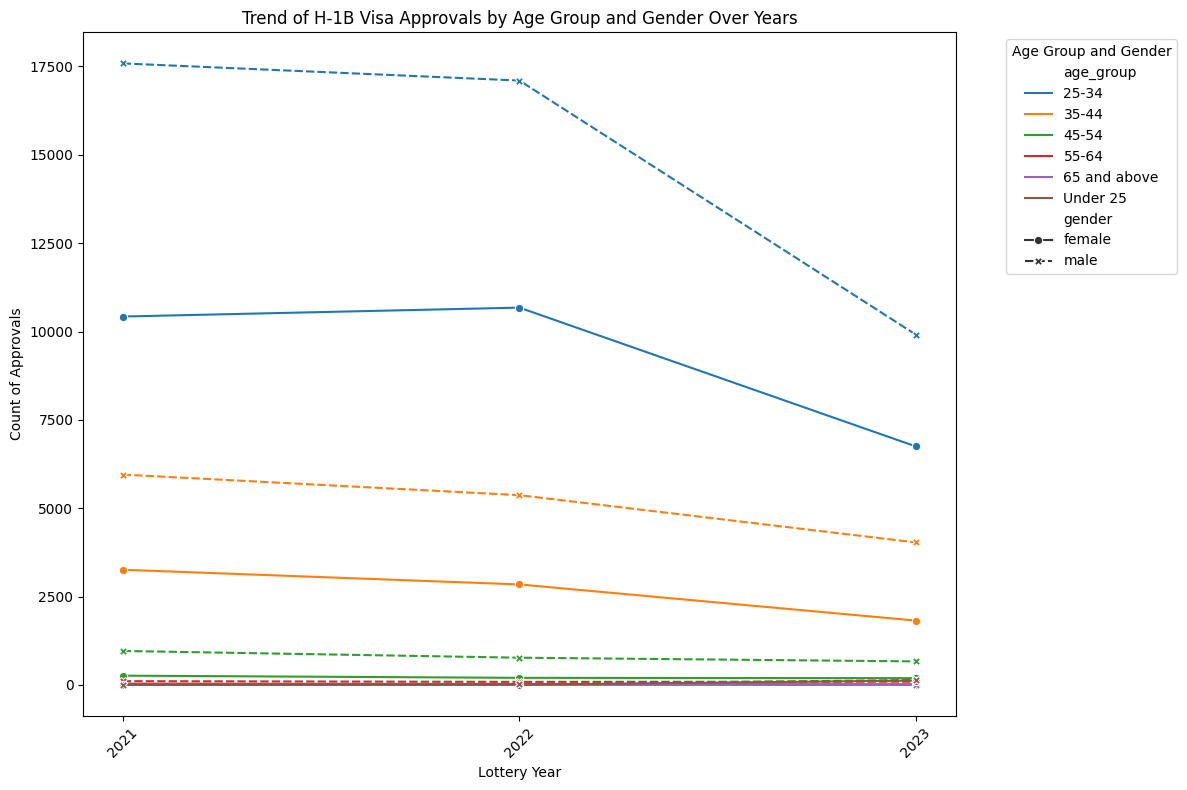

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

sns.lineplot(data=result, x='lottery_year', y='count', hue='age_group', style='gender', markers=True, dashes=True)

plt.title('Trend of H-1B Visa Approvals by Age Group and Gender Over Years')
plt.xlabel('Lottery Year')
plt.ylabel('Count of Approvals')

plt.legend(title='Age Group and Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Here we see a general decrease in H-1B visa approvals across all age groups from 2021 to 2023, with the steepest decline seen in the 25-34 age group.
The 25-34 age group consistently has the highest number of approvals, followed by the 35-44 age group, while the 45-54, 55-64, and 65+ groups have significantly lower counts.
Moreover, males generally have higher approval counts than females across all age groups, though the gap is more pronounced in the younger age groups, particularly in the 25-34 and 35-44 age ranges.

Q4. Gender Distribution by Work Locations

In [ ]:
query = '''
WITH location_data AS (
    SELECT
        WORKSITE_STATE,
        gender,
        COUNT(*) AS count_by_gender,
        SUM(COUNT(*)) OVER (PARTITION BY WORKSITE_STATE) AS total_by_state
    FROM (
        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2021` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2021` AS s
        ON h.state = s.`id of state`

        UNION ALL

        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2022` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2022` AS s
        ON h.state = s.`id of state`

        UNION ALL

        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2023` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2023` AS s
        ON h.state = s.`id of state`
    )
    GROUP BY WORKSITE_STATE, gender
)
SELECT
    WORKSITE_STATE,
    gender,
    count_by_gender,
    total_by_state,
    ROUND((count_by_gender * 100.0 / total_by_state), 2) AS percentage
FROM location_data
ORDER BY total_by_state DESC, percentage DESC;
'''

# Run the query using BigQuery's client
from google.cloud import bigquery
client = bigquery.Client()

# Execute the query and convert the result to a DataFrame
result = client.query(query).to_dataframe()

# Display the result
result.head(30) # Show the first 20 rows for broader context

,WORKSITE_STATE,gender,count_by_gender,total_by_state,percentage
0,CA,male,13825,22508,61.42
1,CA,female,8683,22508,38.58
2,TX,male,7552,11320,66.71
3,TX,female,3768,11320,33.29
4,NY,male,4754,8647,54.98
5,NY,female,3893,8647,45.02
6,WA,male,5497,8588,64.01
7,WA,female,3091,8588,35.99
8,NJ,male,3543,5662,62.58
9,NJ,female,2119,5662,37.42


California (CA) stands out as the state with the highest number of applicants, totaling 22,481, with males accounting for 61.41% and females 38.59%. The significant male dominance may be attributed to California’s concentration in technology sectors, which are traditionally male-dominated. Texas (TX) follows with 11,297 applications, where males constitute 66.7% and females only 33.3%. This gender disparity in Texas is likely linked to industries such as energy and engineering, which also tend to be male-dominated. New York (NY), with 8,631 applications, exhibits a more balanced gender distribution, with 55% males and 45% females. This relative balance could be explained by New York’s diverse job opportunities and inclusive work environment, fostering greater gender representation.

Q5. Are there significant gender differences in average salaries by education level or industry?

In [ ]:
query = """
WITH filtered_data AS (
    SELECT *,
           SAFE_CAST(ben_year_of_birth AS INT64) AS year_of_birth
    FROM (
        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2021` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2021` AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'

        UNION ALL

        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2022` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2022` AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'

        UNION ALL

        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2023` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2023` AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'
    )
    WHERE REGEXP_CONTAINS(ben_year_of_birth, r'^\d+$')
),
age_group_data AS (
    SELECT *,
           CASE
               WHEN (EXTRACT(YEAR FROM CURRENT_DATE()) - year_of_birth) < 25 THEN 'Under 25'
               WHEN (EXTRACT(YEAR FROM CURRENT_DATE()) - year_of_birth) BETWEEN 25 AND 34 THEN '25-34'
               WHEN (EXTRACT(YEAR FROM CURRENT_DATE()) - year_of_birth) BETWEEN 35 AND 44 THEN '35-44'
               WHEN (EXTRACT(YEAR FROM CURRENT_DATE()) - year_of_birth) BETWEEN 45 AND 54 THEN '45-54'
               WHEN (EXTRACT(YEAR FROM CURRENT_DATE()) - year_of_birth) BETWEEN 55 AND 64 THEN '55-64'
               ELSE '65 and above'
           END AS age_group
    FROM filtered_data
)

SELECT lottery_year, age_group, gender,COUNT(*) AS count
FROM age_group_data
GROUP BY lottery_year, age_group, gender
ORDER BY lottery_year, age_group, gender
"""
result = client.query(query).to_dataframe()
result.head()

,lottery_year,age_group,gender,count
0,2021,25-34,female,10424
1,2021,25-34,male,17586
2,2021,35-44,female,3260
3,2021,35-44,male,5952
4,2021,45-54,female,263


In [ ]:
query = '''
WITH salary_by_gender_education AS (
    SELECT
        ED_LEVEL_DEFINITION AS education_level,
        gender,
        AVG(CAST(BEN_COMP_PAID AS FLOAT64)) AS avg_salary,
        COUNT(*) AS num_applicants
    FROM (
        SELECT *
        FROM (
            SELECT *
            FROM `ba775-project-team-6.h1b_dataset.2021` AS h
            LEFT JOIN `ba775-project-team-6.state_data.2021` AS s
            ON h.state = s.`id of state`

            UNION ALL

            SELECT *
            FROM `ba775-project-team-6.h1b_dataset.2022` AS h
            LEFT JOIN `ba775-project-team-6.state_data.2022` AS s
            ON h.state = s.`id of state`

            UNION ALL

            SELECT *
            FROM `ba775-project-team-6.h1b_dataset.2023` AS h
            LEFT JOIN `ba775-project-team-6.state_data.2023` AS s
            ON h.state = s.`id of state`
        )
    )
    WHERE gender IN ('male', 'female')
      AND BEN_COMP_PAID IS NOT NULL
    GROUP BY education_level, gender
),
salary_by_gender_industry AS (
    SELECT
        NAICS_CODE AS industry_code,
        gender,
        AVG(CAST(BEN_COMP_PAID AS FLOAT64)) AS avg_salary,
        COUNT(*) AS num_applicants
    FROM (
        SELECT *
        FROM (
            SELECT *
            FROM `ba775-project-team-6.h1b_dataset.2021` AS h
            LEFT JOIN `ba775-project-team-6.state_data.2021` AS s
            ON h.state = s.`id of state`

            UNION ALL

            SELECT *
            FROM `ba775-project-team-6.h1b_dataset.2022` AS h
            LEFT JOIN `ba775-project-team-6.state_data.2022` AS s
            ON h.state = s.`id of state`

            UNION ALL

            SELECT *
            FROM `ba775-project-team-6.h1b_dataset.2023` AS h
            LEFT JOIN `ba775-project-team-6.state_data.2023` AS s
            ON h.state = s.`id of state`
        )
    )
    WHERE gender IN ('male', 'female')
      AND BEN_COMP_PAID IS NOT NULL
    GROUP BY industry_code, gender
)
SELECT
    'Education Level' AS category_type,
    education_level AS category,
    gender,
    avg_salary,
    num_applicants
FROM salary_by_gender_education
UNION ALL
SELECT
    'Industry' AS category_type,
    CAST(industry_code AS STRING) AS category,
    gender,
    avg_salary,
    num_applicants
FROM salary_by_gender_industry
ORDER BY category_type, category, gender;
'''
from google.cloud import bigquery
client = bigquery.Client()

result = client.query(query).to_dataframe()

result.head(30) # Show the first 20 rows for broader context

,category_type,category,gender,avg_salary,num_applicants
0,Education Level,"1 OR MORE YEARS OF COLLEGE, NO DEGREE",female,101464.200000,10
1,Education Level,"1 OR MORE YEARS OF COLLEGE, NO DEGREE",male,134777.045000,24
2,Education Level,ASSOCIATE'S DEGREE,female,82004.018182,11
3,Education Level,ASSOCIATE'S DEGREE,male,113212.400000,17
4,Education Level,BACHELOR'S DEGREE,female,101068.429945,9033
5,Education Level,BACHELOR'S DEGREE,male,113487.084214,15829
6,Education Level,DOCTORATE DEGREE,female,132756.310453,2207
7,Education Level,DOCTORATE DEGREE,male,131345.391894,5079
8,Education Level,HIGH SCHOOL GRADUATE,female,77295.000000,3
9,Education Level,HIGH SCHOOL GRADUATE,male,136498.025882,17


The analysis reveals significant gender-based salary disparities across education levels and industries. At the **Bachelor’s Degree** level, males earn substantially more on average compared to females, with the average salary for females at \$101,068.43 (from 9,033 applicants) while males receive significantly higher compensation. Similarly, at the **Associate's Degree** level, the average salary for males (\$113,212.40 from 17 applicants) surpasses that of females (\$82,004.02 from 11 applicants) by over \$30,000. Even among those with **“1 or More Years of College, No Degree,”** males earn an average of \$134,777.05 compared to \$101,464.20 for females, reflecting a gap of more than \$33,000.

Across industries, high-paying sectors exhibit a stark disparity where males dominate higher-salaried roles, particularly in industries with fewer female applicants. This trend suggests that systemic biases may influence both hiring and salary decisions, even in highly educated applicant pools. While the dataset does not explore causes, the findings imply structural barriers that limit equitable compensation for women, regardless of their qualifications or industry. Furthermore, male-dominated fields amplify these gaps, with limited female representation often correlating with greater disparities in pay.

Q6. Trend Analysis: Compare the number of H1B applications for the top 10 employers across the years (2021–2023).

In [ ]:
%%bigquery
SELECT
  employer_name,
  EXTRACT(YEAR FROM PARSE_DATE('%m/%d/%Y', REC_DATE)) AS year,
  COUNT(*) AS total_applications
FROM (
    SELECT
      h.employer_name,
      h.REC_DATE
    FROM `ba775-project-team-6.h1b_dataset.2021` AS h
    LEFT JOIN `ba775-project-team-6.state_data.2021` AS s
    ON h.state = s.`id of state`

    UNION ALL

    SELECT
      h.employer_name,
      h.REC_DATE
    FROM `ba775-project-team-6.h1b_dataset.2022` AS h
    LEFT JOIN `ba775-project-team-6.state_data.2022` AS s
    ON h.state = s.`id of state`

    UNION ALL

    SELECT
      h.employer_name,
      h.REC_DATE
    FROM `ba775-project-team-6.h1b_dataset.2023` AS h
    LEFT JOIN `ba775-project-team-6.state_data.2023` AS s
    ON h.state = s.`id of state`
)
WHERE SAFE.PARSE_DATE('%m/%d/%Y', REC_DATE) IS NOT NULL  -- Filter valid dates only
GROUP BY employer_name, year
ORDER BY total_applications DESC
LIMIT 50;


Query is running:   0%|          |

Downloading:   0%|          |

,employer_name,year,total_applications
0,Amazon.com Services LLC,2020,2075
1,Amazon.com Services LLC,2021,1869
2,Amazon.com Services LLC,2022,1222
3,Google LLC,2020,801
4,Google LLC,2021,534
5,Microsoft Corporation,2020,528
6,"Facebook, Inc.",2020,527
7,Google LLC,2022,501
8,"Facebook, Inc.",2021,492
9,Infosys Limited,2022,491


In [ ]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt

# Initialize BigQuery client
client = bigquery.Client()

# Define the SQL query
query = """
SELECT
  employer_name,
  EXTRACT(YEAR FROM PARSE_DATE('%m/%d/%Y', REC_DATE)) AS year,
  COUNT(*) AS total_applications
FROM (
    SELECT
      h.employer_name,
      h.REC_DATE
    FROM `ba775-project-team-6.h1b_dataset.2021` AS h
    LEFT JOIN `ba775-project-team-6.state_data.2021` AS s
    ON h.state = s.`id of state`

    UNION ALL

    SELECT
      h.employer_name,
      h.REC_DATE
    FROM `ba775-project-team-6.h1b_dataset.2022` AS h
    LEFT JOIN `ba775-project-team-6.state_data.2022` AS s
    ON h.state = s.`id of state`

    UNION ALL

    SELECT
      h.employer_name,
      h.REC_DATE
    FROM `ba775-project-team-6.h1b_dataset.2023` AS h
    LEFT JOIN `ba775-project-team-6.state_data.2023` AS s
    ON h.state = s.`id of state`
)
WHERE SAFE.PARSE_DATE('%m/%d/%Y', REC_DATE) IS NOT NULL
GROUP BY employer_name, year
ORDER BY total_applications DESC
LIMIT 50;
"""

# Execute the query and save results to a DataFrame
df = client.query(query).to_dataframe()

# Identify the top 10 employers by total applications across all years
top_10_employers = (
    df.groupby('employer_name')['total_applications']
    .sum()
    .nlargest(10)
    .index
)

# Filter data for only the top 10 employers
filtered_data = df[df['employer_name'].isin(top_10_employers)]

# Pivot data for plotting
pivot_data = filtered_data.pivot(index='year', columns='employer_name', values='total_applications').fillna(0)

# Plot the trend analysis
plt.figure(figsize=(14, 8))
pivot_data.plot(kind='line', marker='o', linewidth=2, figsize=(14, 8))

# Customize the chart
plt.title('H1B Applications Trend for Top Employers (2021–2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Applications', fontsize=14)
plt.legend(title='Employer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(pivot_data.index, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the chart
plt.tight_layout()
plt.show()


Q7. How do the approval counts for H1B visas vary across different job titles and companies, and which companies dominate approvals for specific high-demand job titles?

In [ ]:
query = """
WITH merged_data AS (
    -- Merge data from 2021, 2022, and 2023 datasets
    SELECT
        h.JOB_TITLE,
        h.gender,
        h.employer_name,
        COUNT(*) AS approval_count
    FROM `ba775-project-team-6.h1b_dataset.2021` AS h
    WHERE h.FIRST_DECISION = 'Approved'
    GROUP BY h.JOB_TITLE, h.gender, h.employer_name

    UNION ALL

    SELECT
        h.JOB_TITLE,
        h.gender,
        h.employer_name,
        COUNT(*) AS approval_count
    FROM `ba775-project-team-6.h1b_dataset.2022` AS h
    WHERE h.FIRST_DECISION = 'Approved'
    GROUP BY h.JOB_TITLE, h.gender, h.employer_name

    UNION ALL

    SELECT
        h.JOB_TITLE,
        h.gender,
        h.employer_name,
        COUNT(*) AS approval_count
    FROM `ba775-project-team-6.h1b_dataset.2023` AS h
    WHERE h.FIRST_DECISION = 'Approved'
    GROUP BY h.JOB_TITLE, h.gender, h.employer_name
)
SELECT
    JOB_TITLE,
    gender,
    employer_name AS company,
    SUM(approval_count) AS total_approval_count
FROM merged_data
GROUP BY JOB_TITLE, gender, employer_name
ORDER BY total_approval_count DESC;
"""

from google.cloud import bigquery
client = bigquery.Client()

result = client.query(query).to_dataframe()

# Display the result
result.head(30)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data extracted from the provided screenshot for illustration
data = {
    "JOB_TITLE": [
        "SOFTWARE DEVELOPMENT ENGINEER I", "SOFTWARE ENGINEER", "SOFTWARE DEVELOPMENT ENGINEER I",
        "SOFTWARE ENGINEER", "SOFTWARE DEVELOPMENT ENGINEER II", "SOFTWARE ENGINEER", "SOFTWARE DEVELOPER",
        "SOFTWARE ENGINEER", "SOFTWARE ENGINEER", "PROCESS ENGINEER", "ARCHITECT", "SOFTWARE ENGINEER",
        "SOFTWARE DEVELOPER", "RESEARCH SCIENTIST", "SOFTWARE DEVELOPMENT ENGINEER I", "DEVELOPER USER INTERFACE",
        "ANALYST", "SOFTWARE DEVELOPMENT ENGINEER I", "SOFTWARE DEVELOPMENT ENGR I", "SOFTWARE ENGINEER",
        "SOFTWARE ENGINEER", "ANALYST", "TECHNOLOGY ANALYST US", "PROCESS ENGINEER", "SENIOR SYSTEMS ANALYST",
        "COMPONENT DESIGN ENGINEER", "SOFTWARE DEVELOPMENT ENGINEER II", "APPLIED SCIENTIST II",
        "SOFTWARE DEVELOPMENT ENGINEER I", "DEVELOPER USER INTERFACE"
    ],
    "gender": [
        "male", "male", "female", "male", "male", "female", "male", "male", "female", "male", "male", "female",
        "female", "female", "male", "male", "female", "male", "male", "male", "male", "male", "male", "female",
        "male", "male", "male", "male", "male", "female"
    ],
    "company": [
        "Amazon.com Services LLC", "Google LLC", "Amazon.com Services LLC", "Microsoft Corporation",
        "Amazon.com Services LLC", "Google LLC", "Oracle America, Inc.", "Facebook, Inc.",
        "Microsoft Corporation", "Intel Corporation", "Tata Consultancy Services Limited", "Facebook, Inc.",
        "Oracle America, Inc.", "Facebook, Inc.", "AMAZON DEVELOPMENT CENTER U.S., INC.",
        "Tata Consultancy Services Limited", "Goldman Sachs & Co LLC", "Amazon Web Services, Inc.",
        "Amazon.com Services LLC", "Bloomberg LP", "Cisco Systems, Inc.", "Goldman Sachs & Co LLC",
        "Infosys Limited", "Intel Corporation", "Cognizant Technology Solutions US Corp",
        "Intel Corporation", "Amazon.com Services LLC", "Amazon.com Services LLC", "Amazon DEVELOPMENT CENTER U.S., INC.",
        "Tata Consultancy Services Limited"
    ],
    "total_approval_count": [
        1274, 825, 631, 448, 405, 316, 302, 300, 257, 228, 212, 198, 197, 182, 166, 149, 134, 127, 125, 101,
        101, 100, 96, 92, 90, 89, 89, 89, 86, 84
    ]
}

# Load data into a DataFrame
df = pd.DataFrame(data)

# Scatter plot to visualize job titles, company names, and approval counts

# Preparing the data
df_scatter = df.groupby(['JOB_TITLE', 'company']).sum().reset_index()

# Setting up the figure
plt.figure(figsize=(16, 10))

# Scatter plot: Job titles on y-axis, companies on x-axis, bubble size for approval count
scatter = plt.scatter(
    x=df_scatter['company'],
    y=df_scatter['JOB_TITLE'],
    s=df_scatter['total_approval_count'],  # Bubble size based on approval count
    alpha=0.6,
    c=df_scatter['total_approval_count'],
    cmap='viridis'
)

# Adding titles and labels
plt.title("Approval Counts by Job Title and Company (Bubble Chart)", fontsize=16)
plt.xlabel("Company Name", fontsize=14)
plt.ylabel("Job Title", fontsize=14)
plt.xticks(rotation=90)  # Rotate company names for better readability
plt.colorbar(scatter, label="Approval Count")  # Add colorbar for approval counts

# Display the plot
plt.tight_layout()
plt.show()


This bubble chart represents H1B visa approval counts categorized by job title and company name. Each bubble's size corresponds to the volume of approvals, and the color gradient reflects the relative approval counts, with larger and lighter-colored bubbles indicating higher counts. The chart reveals that roles such as "Software Development Engineer I" and "Software Development Engineer II" at companies like Amazon and its subsidiaries, as well as Microsoft and other major tech firms, dominate H1B approvals. The high concentration of approvals in the technology sector suggests the industry's heavy reliance on international talent, particularly for software and engineering roles. The distribution also highlights companies like Tata Consultancy Services and Infosys, which are known for their significant use of H1B visas for specialized roles. This visualization effectively underscores the importance of H1B visas in facilitating talent acquisition for key roles in the tech and consulting sectors.

## Conclusion

### Insights & Recommendations

**1. Focus on High-Demand Occupations:**
The analysis highlights that roles such as Software Engineer, Software Developer, Data Scientist, and Business Analyst dominate H-1B applications. These occupations are in high demand and align with the priorities of U.S. employers.

International students should strategically choose academic programs and extracurricular activities that develop relevant technical skills and competencies in these fields. Pursuing certifications, internships, and projects related to these roles can further enhance employability.

**2. Target Top H-1B Employers:**
Companies like Amazon, Google, Microsoft, Meta (Facebook), and Intel consistently rank among the top employers for H-1B applicants due to their extensive reliance on global talent.

To improve chances of securing a position, students should actively participate in campus recruitment events, network with employees from these companies via LinkedIn, and engage with alumni who work there. Joining tech communities, attending career fairs, and showcasing relevant technical skills in their profiles can also help build connections and increase visibility with recruiters.

**3. Pursue Advanced Degrees:**
Advanced education significantly increases H-1B approval rates, as U.S. immigration policies prioritize applicants with higher qualifications. More than two-thirds of approved applicants hold a master’s degree or higher, making it a key factor in boosting approval chances.

Students should consider investing in master’s or doctoral programs that align with high-growth industries like technology or finance. These degrees not only increase the likelihood of approval but also enhance earning potential and open doors to leadership roles.

**4. Leverage Geographic Advantages:**
Certain states, such as California, Texas, and New York, are primary hubs for H-1B visa applications due to their strong tech and business ecosystems. These locations attract top employers and offer ample networking and internship opportunities.

Students should strategically choose universities in these states to benefit from proximity to industry leaders and local job markets. Building connections through local events, internships, and university partnerships with major employers can provide a competitive edge.

**5. Prepare for Salary Negotiations:**
Salary disparities across industries and states highlight the importance of thorough preparation for salary discussions. While H-1B applicants often receive competitive pay, there are significant variations based on location and job role.

To ensure fair compensation, students should conduct detailed market research on salary standards for their role and location. Leveraging resources like salary reports, industry benchmarks, and mentor advice can provide a clear understanding of reasonable expectations. Preparing effectively for interviews and negotiations ensures better outcomes.

### Future Steps

**1. Investigate Visa Denials:**

Analyze rejected applications to understand common reasons for denial. Exploring factors like education level, job title, employer-specific issues, or location could reveal barriers and help applicants better navigate the process.

**2. Modeling Salary and Approval Likelihood:**

Develop predictive models to estimate:
The likelihood of H-1B approval based on key variables like education, industry, and location.
Expected salary ranges for different roles and industries, offering personalized guidance to future applicants.

**3. Track Long-Term Career Outcomes:**

Study the career trajectories of approved applicants to assess their impact on industries and local economies. Focus on metrics such as salary growth, promotions, and retention rates to provide insights into the long-term benefits of H-1B employment.

**4. Incorporate External Data Sources:**

Integrate data on labor market trends, unemployment rates, and educational institution rankings to enrich the analysis and provide deeper context for observed patterns in H-1B approvals.



**Challenges**

1. Table Creation and Permissions
While executing SQL queries, the team encountered challenges in creating or replacing tables due to permission restrictions on the shared BigQuery project. This issue required collaboration with project administrators to adjust access roles and permissions. In cases where direct table creation was not possible, temporary tables and subqueries were employed to ensure the analysis could proceed without compromising efficiency. This approach maintained data integrity and avoided interruptions in the workflow.

2. Complex SQL Query Writing
During the analysis, writing SQL queries to handle multiple datasets across different years and merging them with state-level data presented significant challenges. This required carefully structuring multiple UNION operations and ensuring proper alignment of schemas. For example, the analysis involved joining datasets with differing column names and formats, such as state identifiers and NAICS codes. Overcoming this required precise use of functions like COALESCE, CAST, and PARSE_DATE to standardize data types and handle discrepancies. Additionally, calculating metrics like approval growth rates and percentages involved advanced window functions like LAG and OVER, which demanded meticulous testing to ensure accuracy.


**Generative AI Disclosure**
In completing this project, we relied on Generative AI tools to support us in different parts of our work. Here’s a breakdown of how these tools helped:

1. Debugging Code Issues: Whenever we ran into coding errors or had trouble figuring out why our code wasn’t working, we turned to ChatGPT for help. The AI explained the errors in detail and offered suggestions, making it easier for us to combine this guidance with what we learned in class and fix the problems effectively.

2. Understanding the Dataset: Some of the columns in our dataset had information that wasn’t fully explained in the data dictionary, so we used ChatGPT to fill in the gaps. The AI helped us understand the practical meaning behind certain columns, making it clearer how each part of the dataset contributed to the bigger picture.

3. Grammar Checks: To make sure our writing was clear and professional, we ran our texts through ChatGPT for grammar suggestions. This step helped us refine our work, catch small errors, and present our findings more effectively.

4. Visualization Advice: When it came to data visualization, ChatGPT provided tips on what styles and layouts might work best to tell our story. The AI helped us preview different options, giving us a better sense of what would be both visually appealing and easy to understand for our audience.

5. We reviewed, edited, and validated all AI-generated content ourselves to make sure it met our standards for accuracy and originality, following academic integrity guidelines.


**References**
1. U.S. Department of State. (n.d.). Visa statistics. U.S. Department of State - Bureau of Consular Affairs. https://travel.state.gov/content/travel/en/legal/visa-law0/visa-statistics.html

2. DataCamp. (n.d.). SQL basics cheat sheet. DataCamp. Retrieved November 11, 2024, from https://www.datacamp.com/cheat-sheet/sql-basics-cheat-sheet

3. U.S. Bureau of Labor Statistics. (n.d.). Regional and State Employment and Unemployment [PDF]. U.S. Bureau of Labor Statistics. Retrieved from https://www.bls.gov/news.release/pdf/srgune.pdf

4. Statista. (n.d.). Per capita U.S. real Gross Domestic Product (GDP) by state from 1997 to 2021. Retrieved from https://www.statista.com/statistics/248063/per-capita-us-real-gross-domestic-product-gdp-by-state/

5. USAFacts. (n.d.). USAFacts. Retrieved from https://usafacts.org/

6. WiseVoter. (n.d.). GDP Growth by State. Retrieved from https://wisevoter.com/state-rankings/gdp-growth-by-state/#google_vignette